In [407]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['font.family'] = 'Malgun Gothic' 

In [408]:
df = pd.read_csv("./datas/ckd_dataset_no3.csv")
df

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

In [409]:
# 컬럼에 대한 정보 
# url : https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

#### 데이터 확인 및 정제

In [410]:
df.shape

(400, 26)

In [411]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [412]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

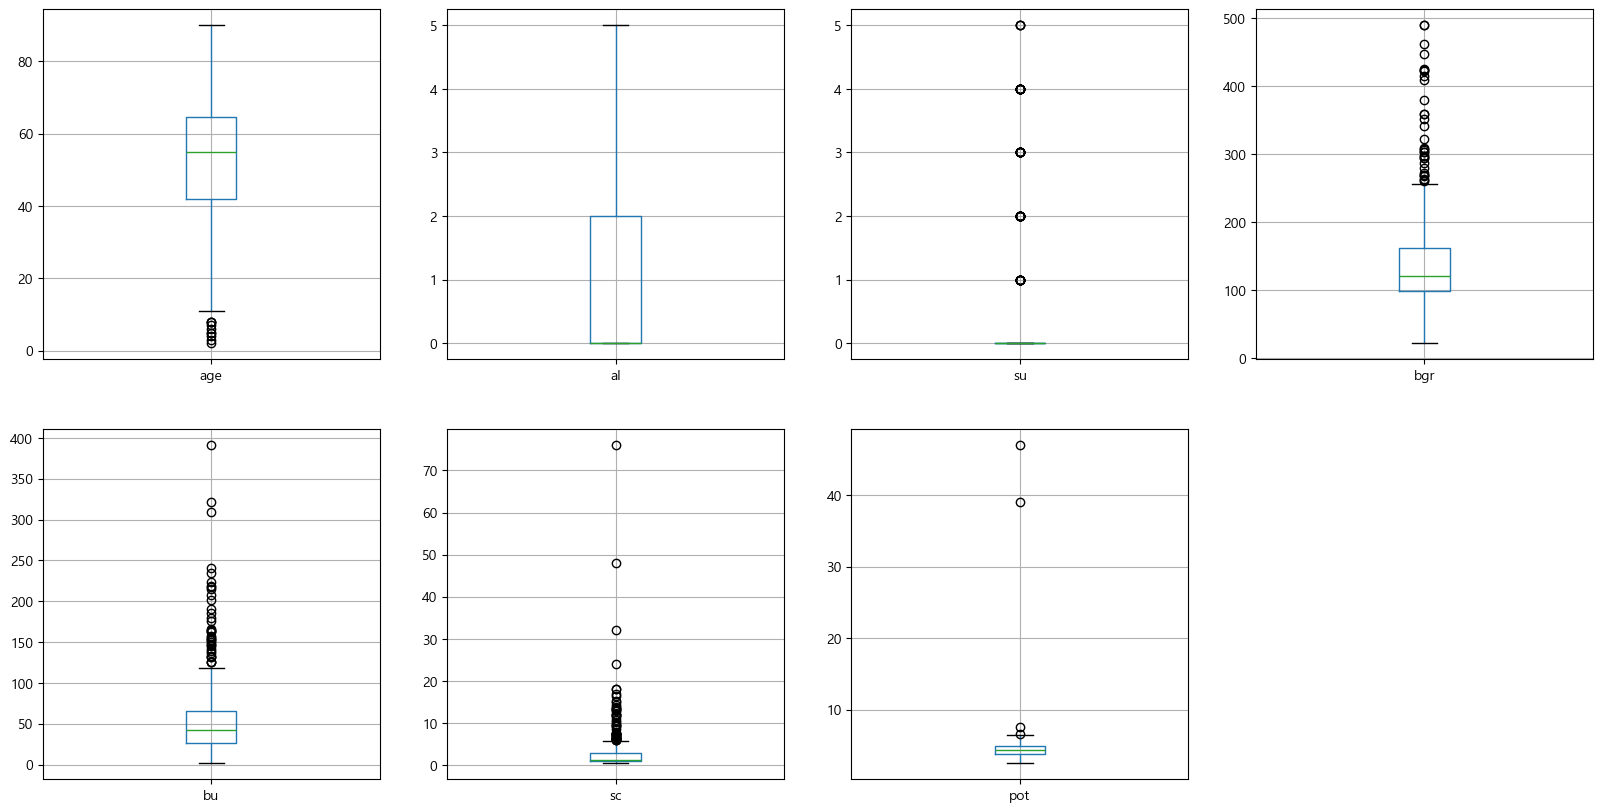

In [413]:
# 이상치 점검
# age min: 2
# al: 50%까지 모두 0, std 1.35
# su : 75%까지 모두 0
# bgr  max : 490
# bu max : 391
# sc max :76
# pot max : 47
import seaborn as sns

c_check = ["age", "al", "su", "bgr", "bu", "sc", "pot"]

plt.figure(figsize=(20,10))

for i, col in enumerate(c_check):
    ax = plt.subplot(2,4,i+1)
    df.boxplot(column=f'{col}')
plt.show()

In [414]:
# 20대 이하 0.5%
len(df[df["age"]<20])

21

In [415]:
# al의 수치 분포가 그래프상에 나오지 않아 개수 확인
len(df[df["al"]<4]) 

329

In [416]:
# describe에는 0으로 나왔으나 su의 값이 분포하고 있음
len(df[df["su"]<1]) # 290
len(df[df["su"]<2]) # 303
len(df[df["su"]<3]) # 321
len(df[df["su"]<4]) # 335
len(df[df["su"]<5]) 

348

In [417]:
# pot의 2개의 값은 확인 후 삭제
df = df[df["pot"]<35]

In [418]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [419]:
# 불필요한 컬럼 제거 
df.drop(['id'],axis=1, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13320\1687602430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'],axis=1, inplace=True)


#### 데이터 정제

In [420]:
# 수치 데이터인데 object타입인 컬럼
v_check = ['pcv', 'wc', 'rc']

for i , col in enumerate(v_check):
    print(f'{col} : ',df[col].unique())

pcv :  ['32' '39' '36' '29' '28' nan '16' '24' '37' '35' '30' '34' '40' '33' '27'
 '\t?' '44' '14' '31' '22' '52' '18' '42' '17' '46' '19' '25' '26' '41'
 '23' '38' '15' '21' '20' '47' '9' '48' '49' '45' '43' '50' '53' '51' '54']
wc :  ['6700' '7800' nan '12100' '4500' '12200' '11000' '3800' '11400' '9200'
 '6900' '8300' '8400' '10300' '9600' '9800' '7900' '6400' '18900' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '9400' '5500' '12500' '5600'
 '7000' '11900' '9100' '5800' '10400' '10700' '6800' '6500' '13600'
 '10200' '9000' '8200' '15200' '16300' '13200' '\t8400' '10500' '4200'
 '10900' '6000' '8100' '9500' '12800' '11200' '8600' '12400' '19100' '\t?'
 '7500' '16700' '2600' '4300' '26400' '8800' '7400' '12000' '15700'
 '11500' '5000' '5400' '6200' '8500' '4700' '5300' '7300' '9900' '5200'
 '9300' '8000' '9700' '5100' '5700' '6600']
rc :  ['3.9' '4.4' nan '3.7' '3.8' '3.4' '2.6' '2.8' '4.3' '3.2' '4.6' '4' '4.1'
 '4.0' '2.5' '4.2' '4.5' '3.1' '4.7' '3.5' '5.2' '2.1' '5.6' '3.

In [421]:
# type 변환
df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
df['wc'] = pd.to_numeric(df['wc'],errors='coerce')
df['rc'] = pd.to_numeric(df['rc'],errors='coerce')

C:\Users\user\AppData\Local\Temp\ipykernel_13320\2565166991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pcv'] = pd.to_numeric(df['pcv'],errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2565166991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wc'] = pd.to_numeric(df['wc'],errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2565166991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [422]:
# 타입별 컬럼 분류 
obj_cols = []
num_cols = []

for i, col in enumerate(df):
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

print(obj_cols, num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


In [423]:
# obj 컬럼의 값 확인
for i , col in enumerate(obj_cols):
    print(f'{col} : ',df[col].unique())

rbc :  ['normal' nan 'abnormal']
pc :  ['abnormal' nan 'normal']
pcc :  ['present' 'notpresent' nan]
ba :  ['notpresent' 'present' nan]
htn :  ['yes' 'no' nan]
dm :  ['no' 'yes' ' yes' '\tno' nan]
cad :  ['no' 'yes' nan]
appet :  ['poor' 'good' nan]
pe :  ['yes' 'no' nan]
ane :  ['yes' 'no' nan]
classification :  ['ckd' 'ckd\t' 'notckd']


In [424]:
# 오기된 데이터 수정
df['dm'].replace({' yes':'yes', '\tno':'no' , '\tyes':'yes'},inplace=True)
df['cad'].replace('\tno','no', inplace=True)
df['classification'].replace('ckd\t','ckd',inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13320\524471112.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dm'].replace({' yes':'yes', '\tno':'no' , '\tyes':'yes'},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13320\524471112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dm'].replace({' yes':'yes', '\tno':'no' , '\

In [425]:
for i , col in enumerate(obj_cols):
    print(f'{col} : ',df[col].unique())

rbc :  ['normal' nan 'abnormal']
pc :  ['abnormal' nan 'normal']
pcc :  ['present' 'notpresent' nan]
ba :  ['notpresent' 'present' nan]
htn :  ['yes' 'no' nan]
dm :  ['no' 'yes' nan]
cad :  ['no' 'yes' nan]
appet :  ['poor' 'good' nan]
pe :  ['yes' 'no' nan]
ane :  ['yes' 'no' nan]
classification :  ['ckd' 'notckd']


In [426]:
# num 컬럼의 결측치 평균값 대체
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

C:\Users\user\AppData\Local\Temp\ipykernel_13320\3888117844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


#### 데이터 분석

#### 1. 질병군별 분석

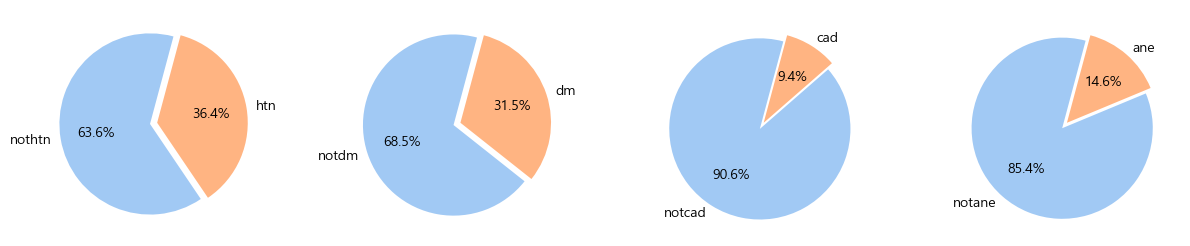

In [427]:
# 질병군별 백분률
disease = ['htn', 'dm', 'cad', 'ane']

plt.figure(figsize=(15,10))


for i, col in enumerate(disease):
    ax = plt.subplot(3,4,i+1)
    label = [f'not{col}', f'{col}']
    value = df[col].value_counts().values
    colors = sns.color_palette('pastel')
    explode = [0.08,0]
    plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

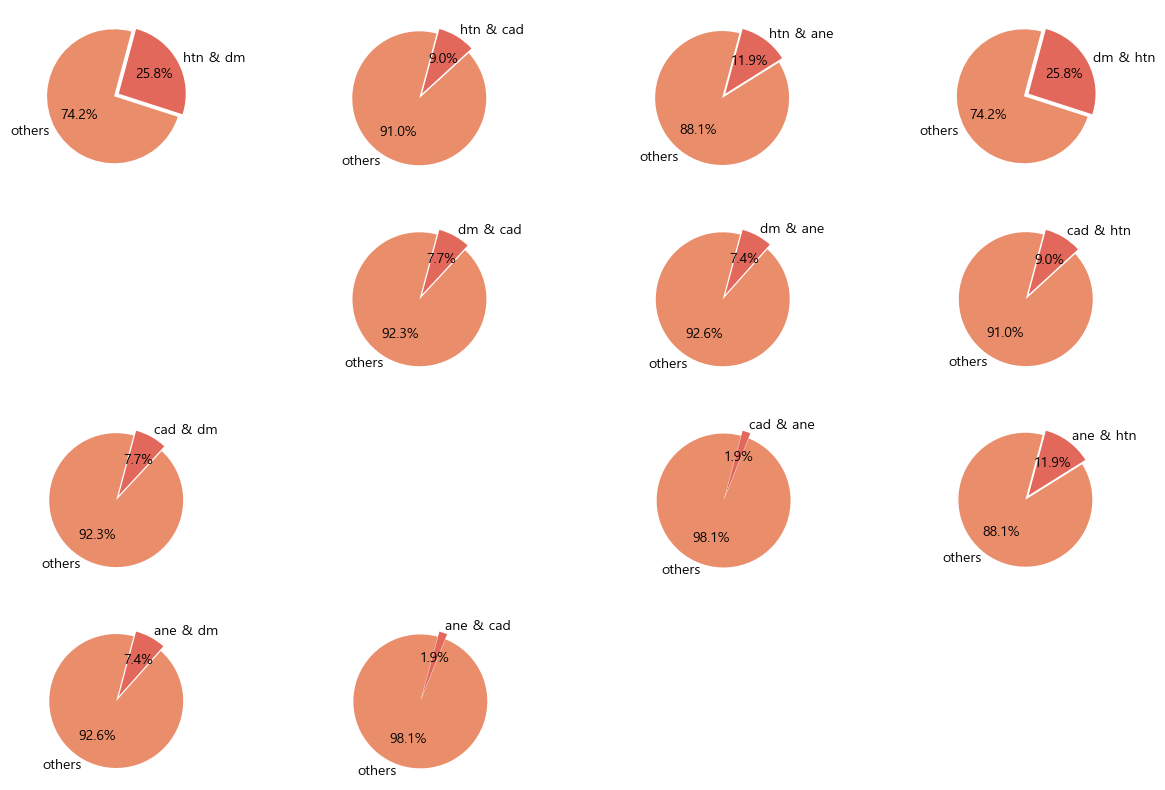

In [428]:
# 중복 질병 환자들의 백분률(전체)
plt.figure(figsize=(15,10))

for i, col_a in enumerate(disease):
    for j, col_b in enumerate(disease):
        if(col_a == col_b or col_b == col_a) : continue
        len(df[(df[col]=='yes') & (df[col_b]=='yes')]) # 106
        a = len(df)-len(df[(df[col_a]=='yes') & (df[col_b]=='yes')]) 

        ax = plt.subplot(4,4,4*i+j)
        label = ['others', f'{col_a} & {col_b}']
        value = [a ,len(df[(df[col_a]=='yes') & (df[col_b]=='yes')])]
        colors = sns.color_palette('flare')
        explode = [0.08,0]
        plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)


In [429]:
len(df) # 총 환자 수
len(df[(df['htn']=='yes') & (df['dm']=='yes')]) # 106
len(df[(df['htn']=='yes') & (df['cad']=='yes')]) # 30
len(df[(df['dm']=='yes') & (df['cad']=='yes')]) # 26
len(df[(df['htn']=='yes') & (df['dm']=='yes') & (df['cad']=='yes')]) # 24

23

In [430]:
a = len(df)-len(df[(df['htn']=='yes') & (df['dm']=='yes')]) 
b = len(df)-len(df[(df['htn']=='yes') & (df['cad']=='yes')])
c = len(df)-len(df[(df['dm']=='yes') & (df['cad']=='yes')]) 
d = len(df)-len(df[(df['htn']=='yes') & (df['dm']=='yes') & (df['cad']=='yes')])

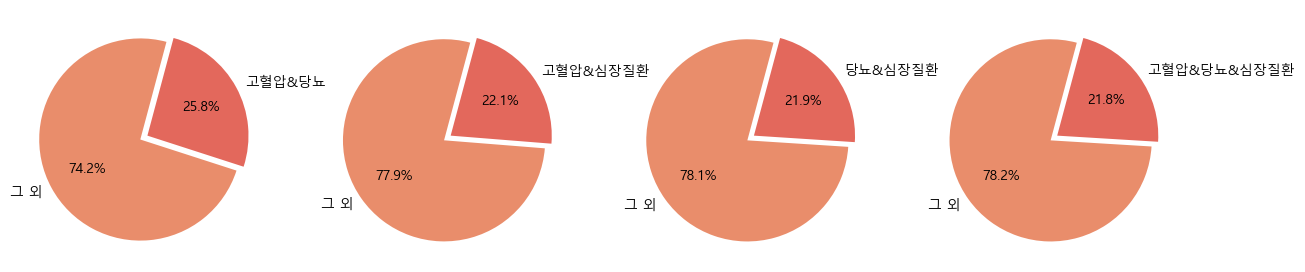

In [431]:
# 중복질병 환자들의 요약 그래프
plt.figure(figsize=(15,10))

ax = plt.subplot(1,4,1)
label = ['그 외', '고혈압&당뇨']
value = [a ,len(df[(df['htn']=='yes') & (df['dm']=='yes')])]
colors = sns.color_palette('flare')
explode = [0.08,0]
plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

ax = plt.subplot(1,4,2)
label = ['그 외', '고혈압&심장질환']
value = [b ,len(df[(df['htn']=='yes') & (df['dm']=='yes')])]
colors = sns.color_palette('flare')
explode = [0.08,0]
plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

ax = plt.subplot(1,4,3)
label = ['그 외', '당뇨&심장질환']
value = [c ,len(df[(df['htn']=='yes') & (df['dm']=='yes')])]
colors = sns.color_palette('flare')
explode = [0.08,0]
plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

ax = plt.subplot(1,4,4)
label = ['그 외', '고혈압&당뇨&심장질환']
value = [d ,len(df[(df['htn']=='yes') & (df['dm']=='yes')])]
colors = sns.color_palette('flare')
explode = [0.08,0]
plt.pie(value, labels=label, autopct='%.1f%%', counterclock=True, startangle=75, explode= explode, colors=colors)

plt.show()

#### 2. 컬럼별 분석

C:\Users\user\AppData\Local\Temp\ipykernel_13320\4132949413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral')
C:\Users\user\AppData\Local\Temp\ipykernel_13320\4132949413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral')
C:\Users\user\AppData\Local\Temp\ipykernel_13320\4132949413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Spectral')
C:\Users\user\AppData\Local\Temp\ipykernel_13320\4132949413.py:6: FutureWarning: 

Passing `palette` without ass

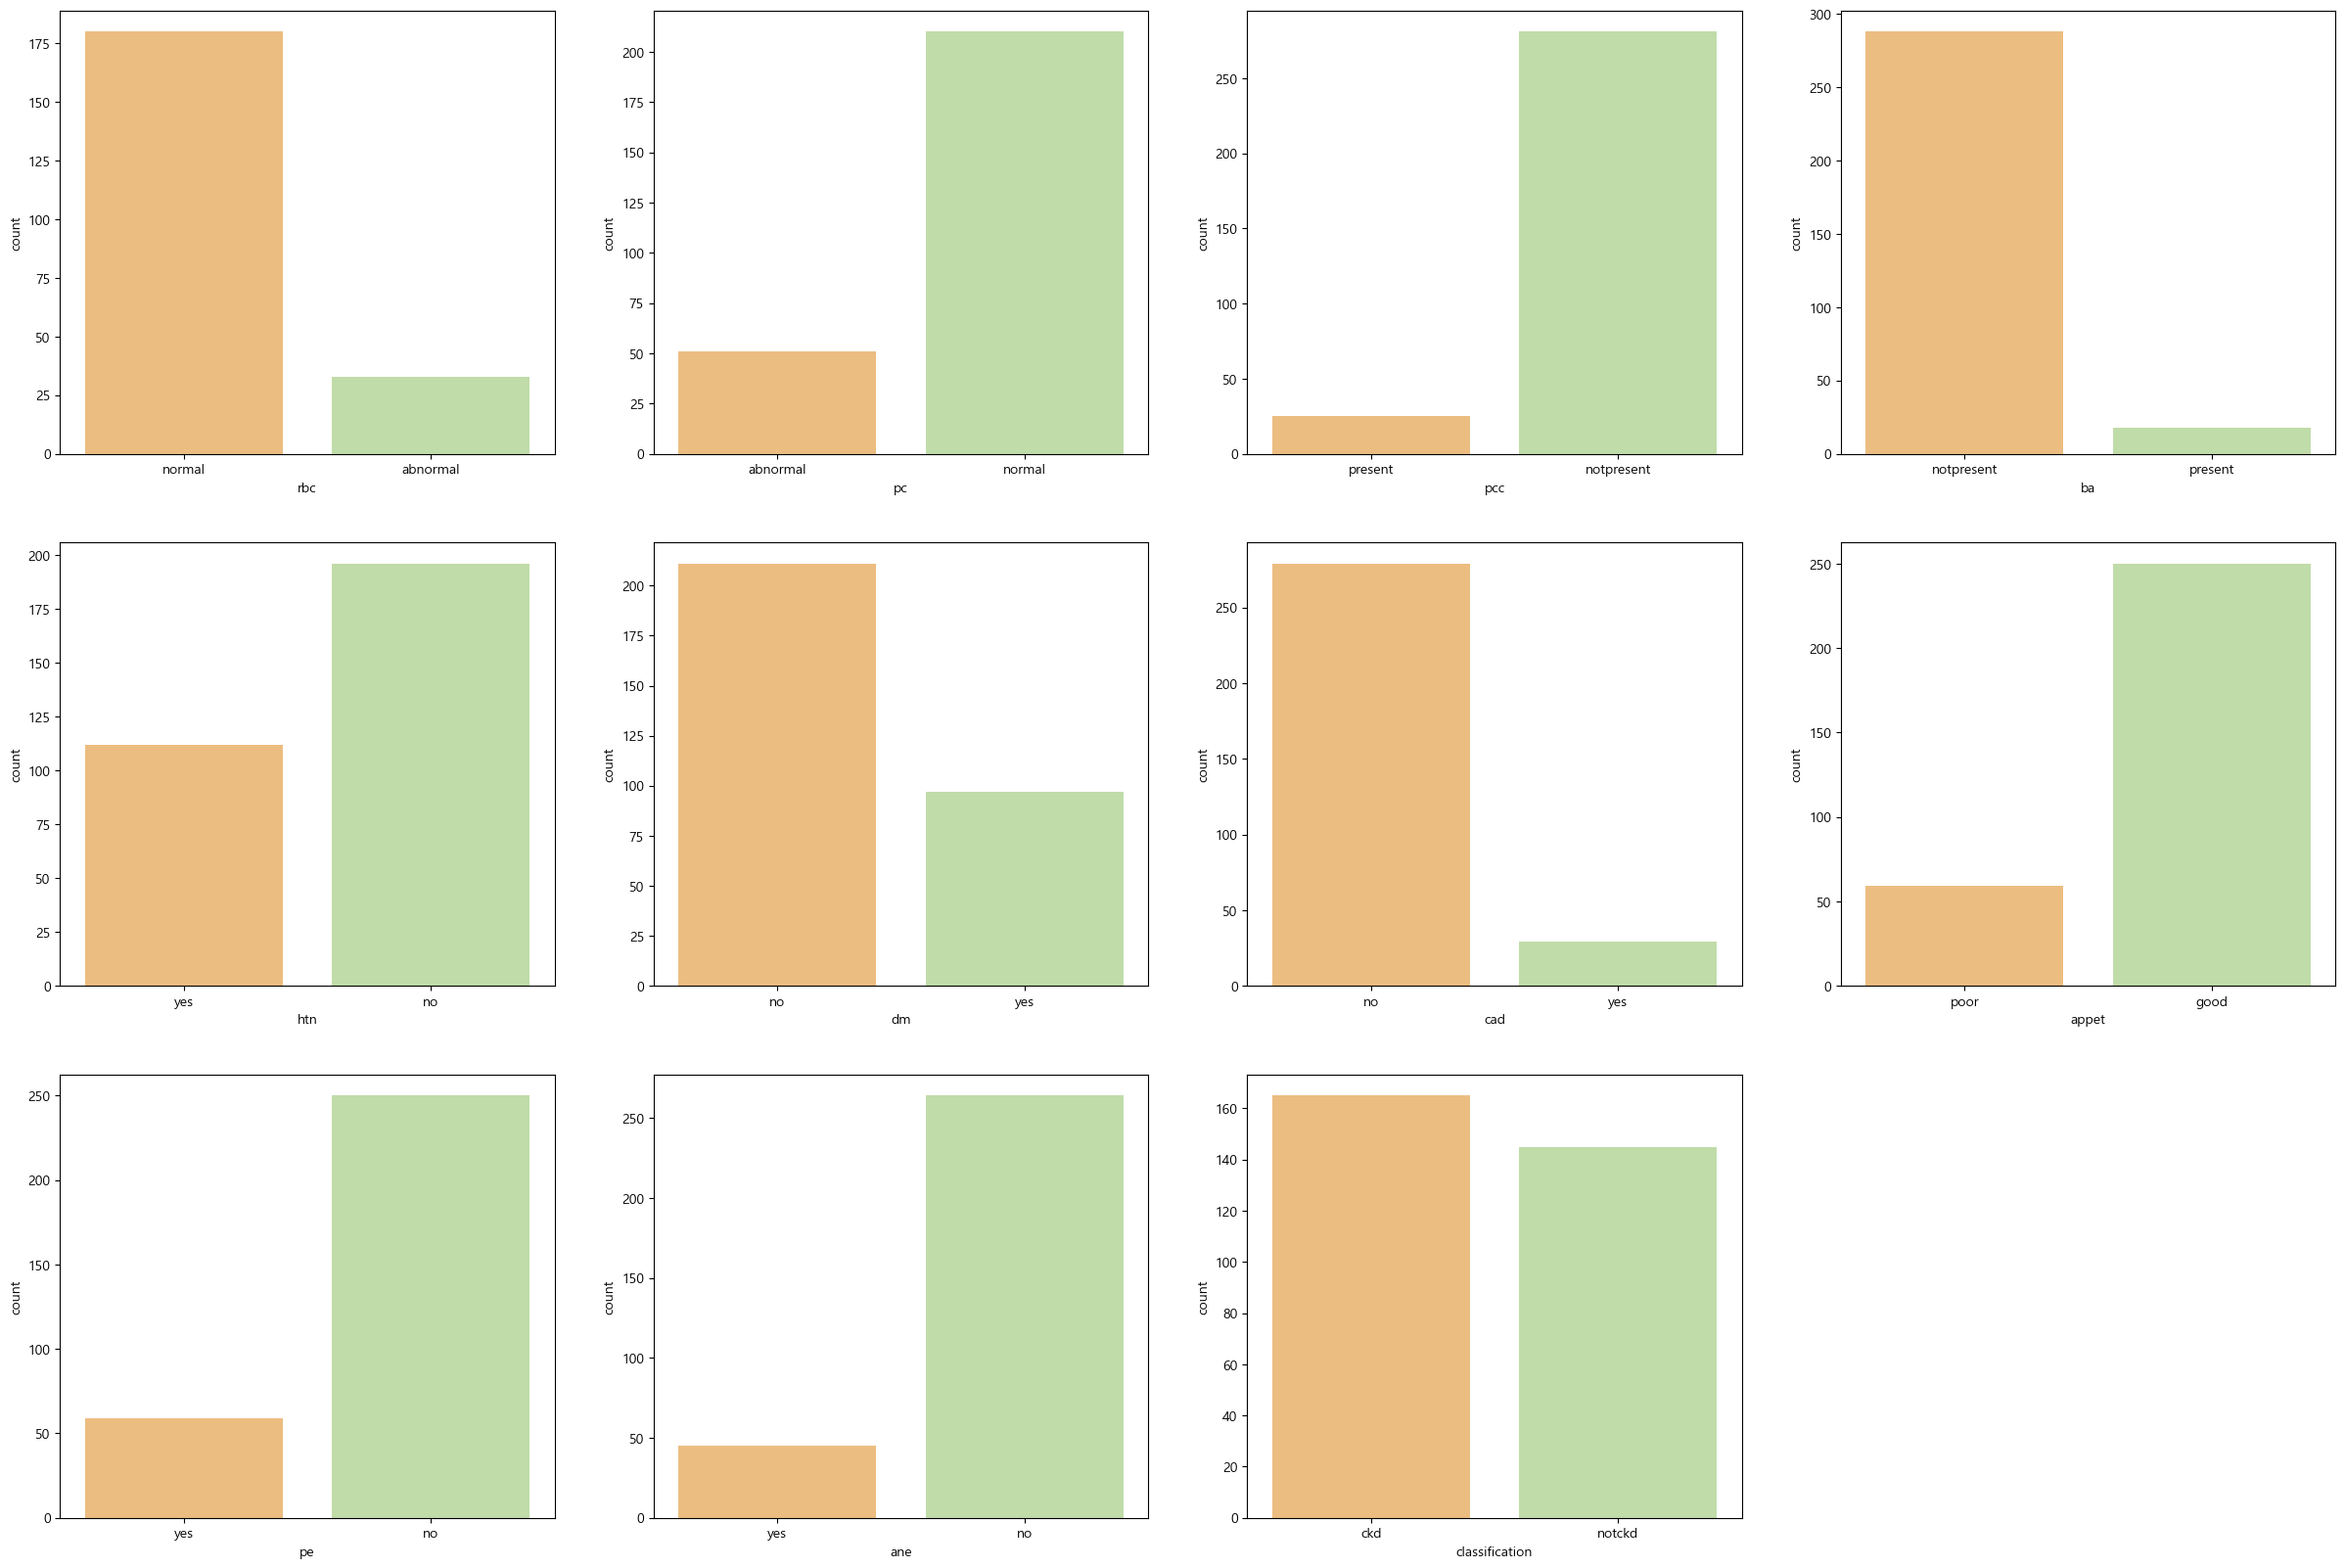

In [432]:
# 컬럼별 카운트
plt.figure(figsize=(30,20))

for i, col in enumerate(obj_cols):
    ax = plt.subplot(3,4,i+1)
    sns.countplot(x=df[col], palette='Spectral')
    plt.xlabel(col)

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13320\2895627817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2895627817.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\28956

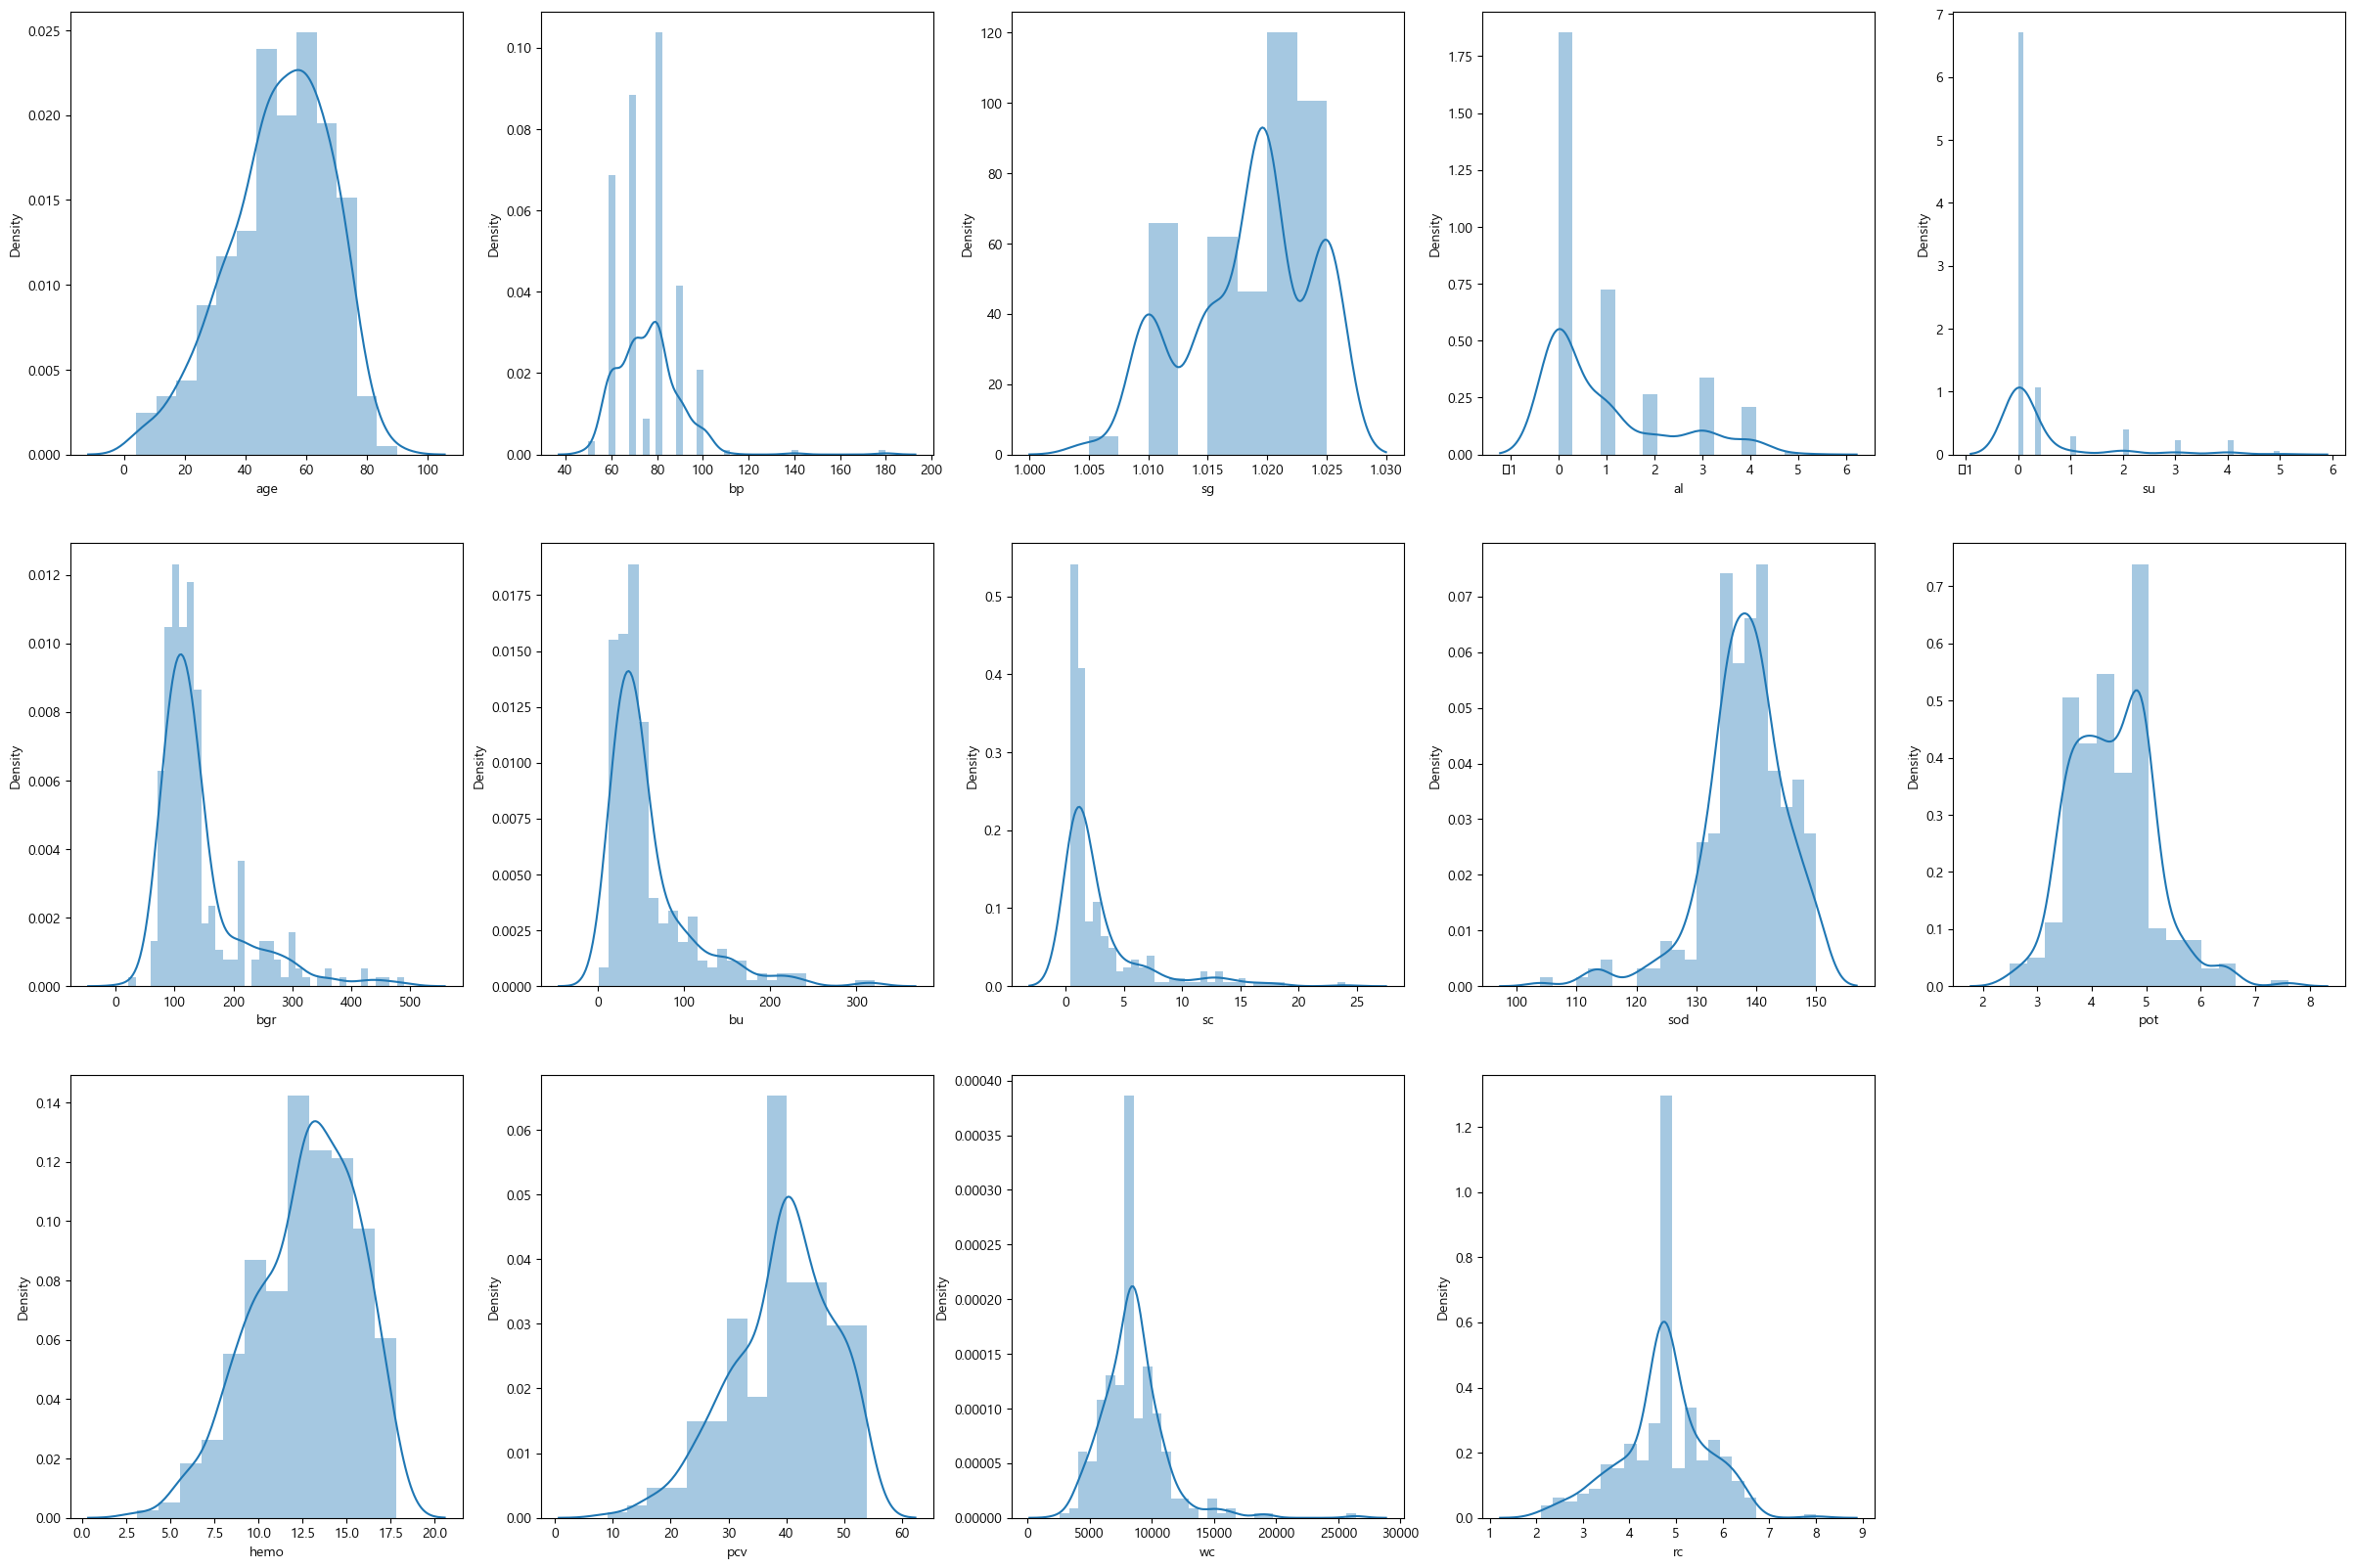

In [433]:
# 수치데이터의 컬럼별 분포
plt.figure(figsize=(30,20))

for i, col in enumerate(num_cols):
    ax = plt.subplot(3,5,i+1)
    sns.distplot(df[col])
    plt.xlabel(col)
plt.show()

In [434]:
# CKD 여부에 따른 컬럼별 KDE 그래프

In [435]:
def kde_plot(col):
    f, ax = plt.subplots(1,1, figsize=(7,5))
    sns.kdeplot(df[df['classification']=='notckd'][col], label='NotCKD', fill=True, ax = ax)
    sns.kdeplot(df[df['classification']=='ckd'][col],label='CKD',  fill=True, ax = ax)
    plt.legend()
    plt.show()

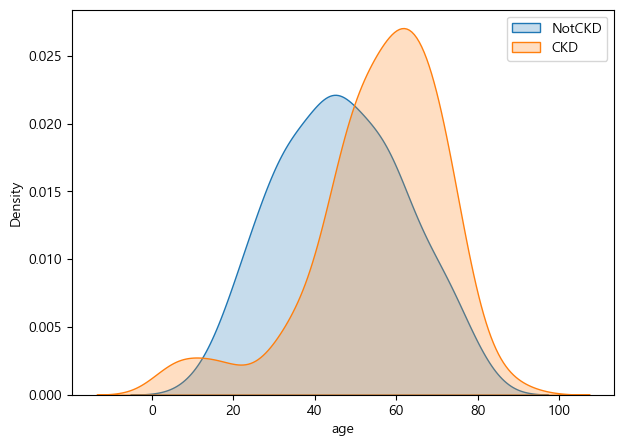

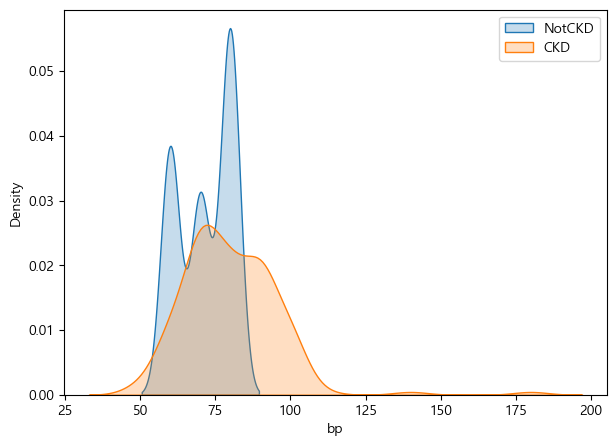

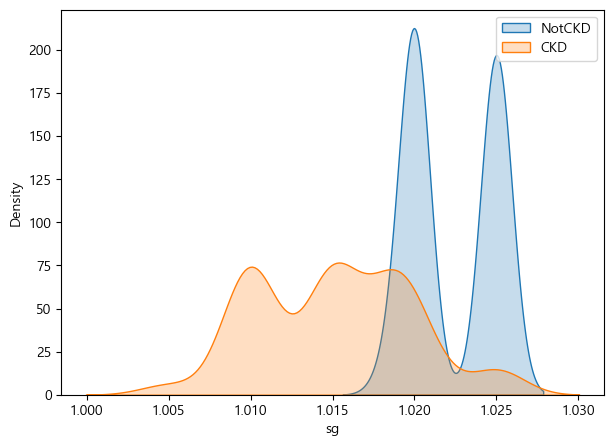

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


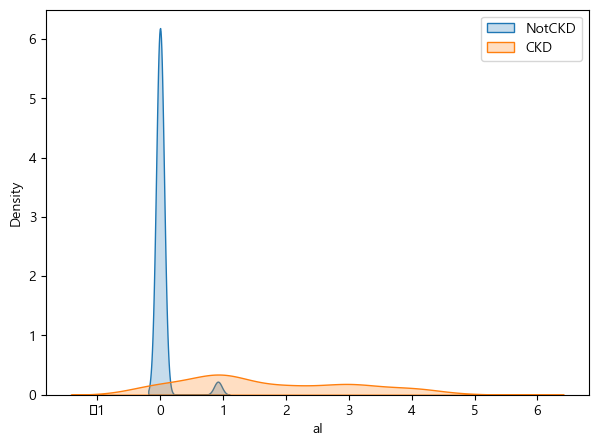

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


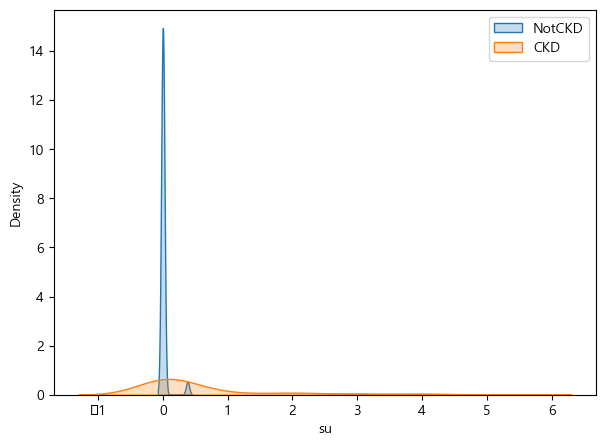

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


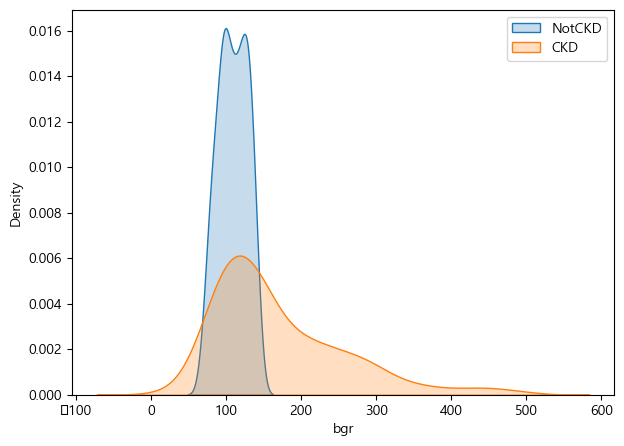

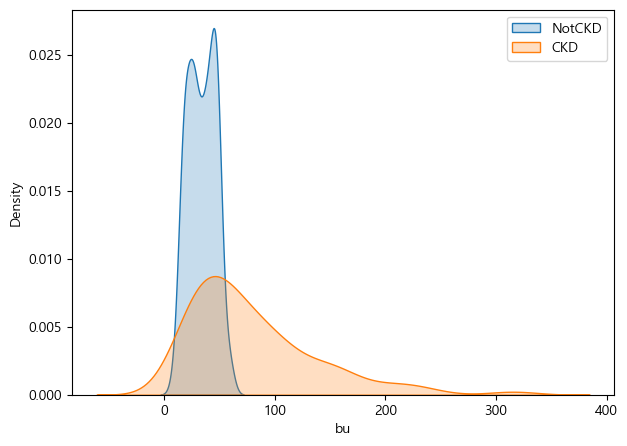

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


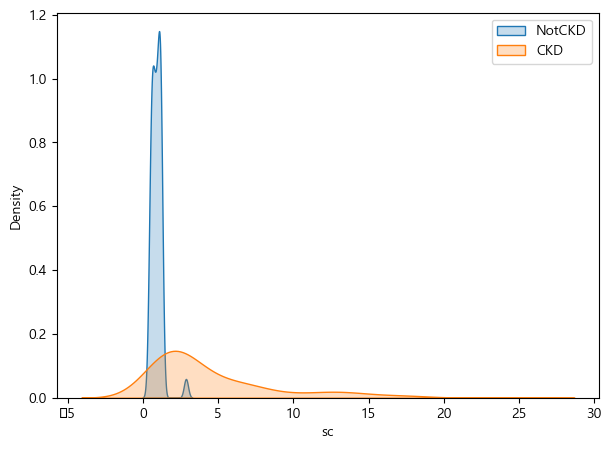

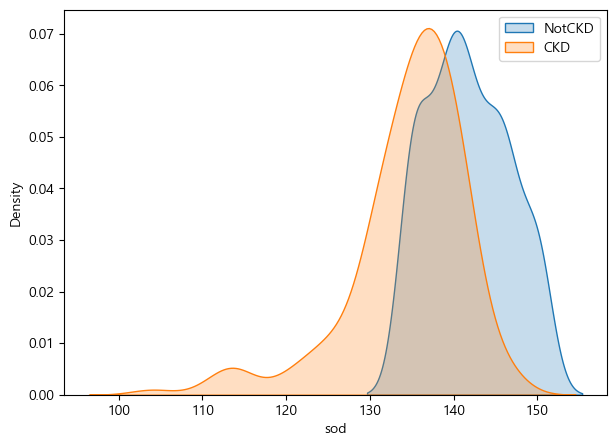

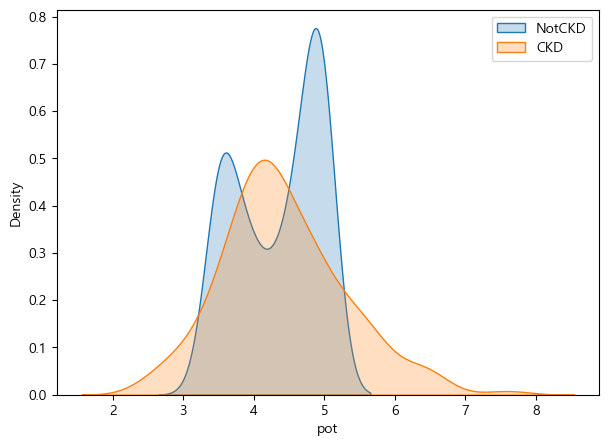

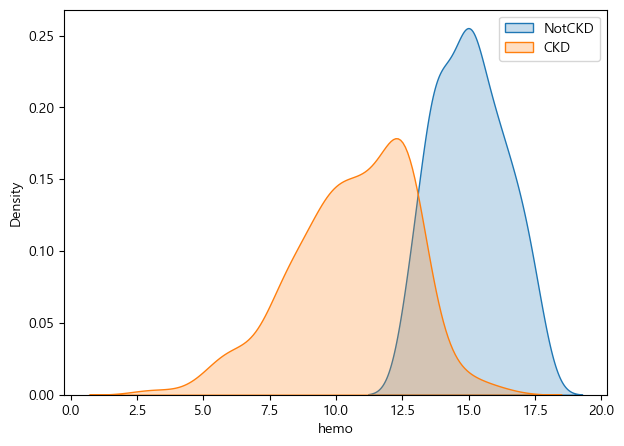

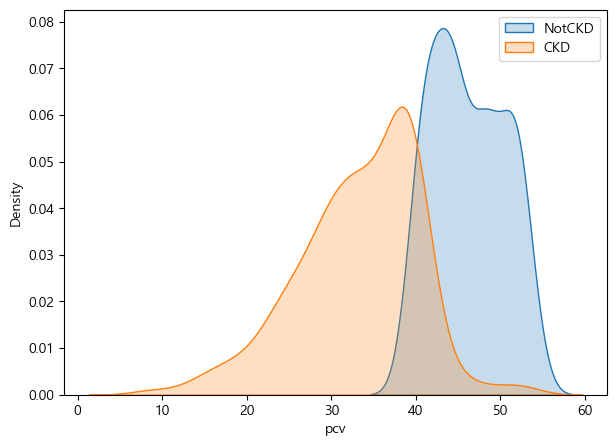

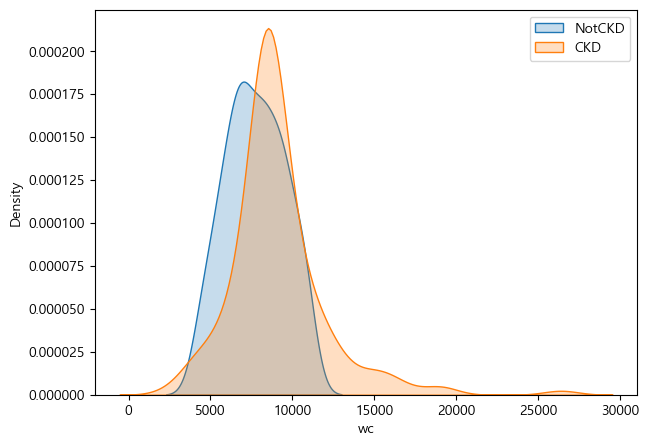

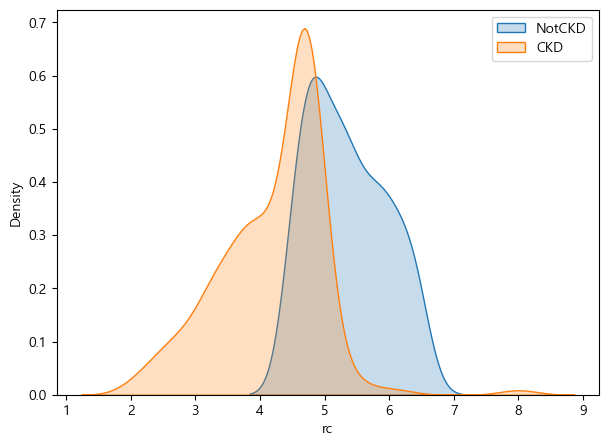

In [436]:
# 수치 데이터에 대하여 전체 KDE 그래프 적용
for i, col in enumerate(num_cols):
    kde_plot(col)

In [437]:
# 타입별 컬럼 재분류 
obj_cols = []
num_cols = []

for i, col in enumerate(df):
    if df[col].dtype == 'object':
        obj_cols.append(col)
    else:
        num_cols.append(col)

print(obj_cols, num_cols)

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']


#### 3. 연령별 분석

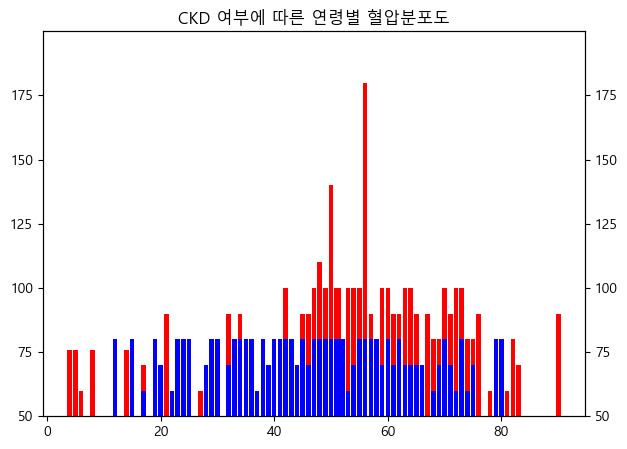

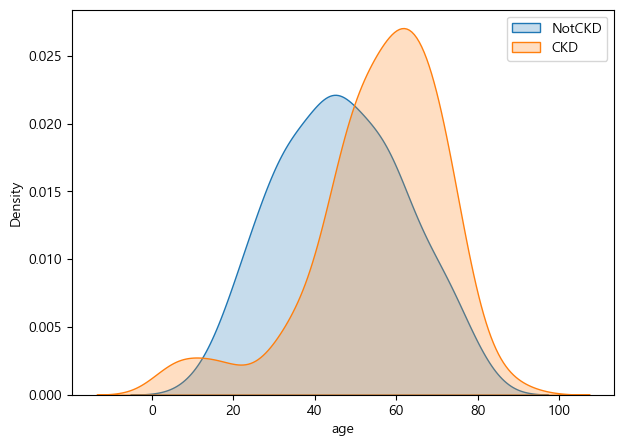

Text(0.5, 1.0, '연령에 따른 고혈압 발생정도')

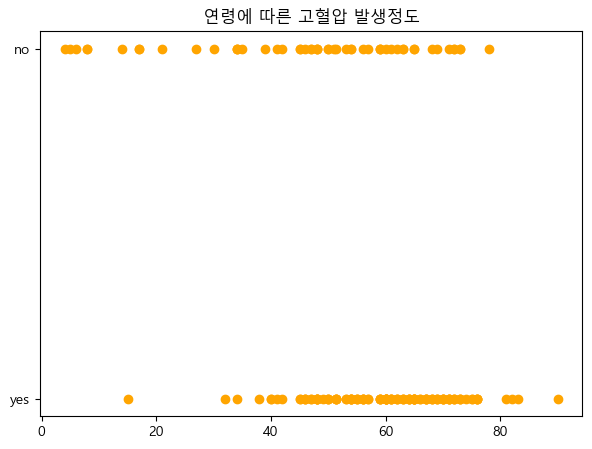

In [438]:
# CKD 여부에 따른 연령별 BP, HTN

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['bp'],color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('CKD 여부에 따른 연령별 혈압분포도')

ax2 = ax1.twinx()
ax2.bar(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['bp'],color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)

kde_plot('age')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['htn'],color='orange')
plt.title('연령에 따른 고혈압 발생정도')


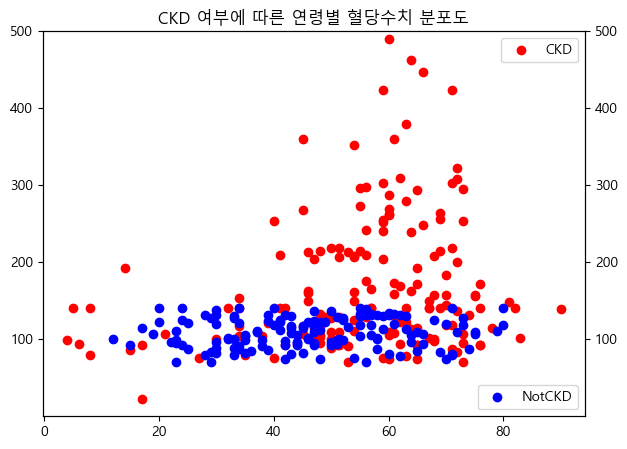

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


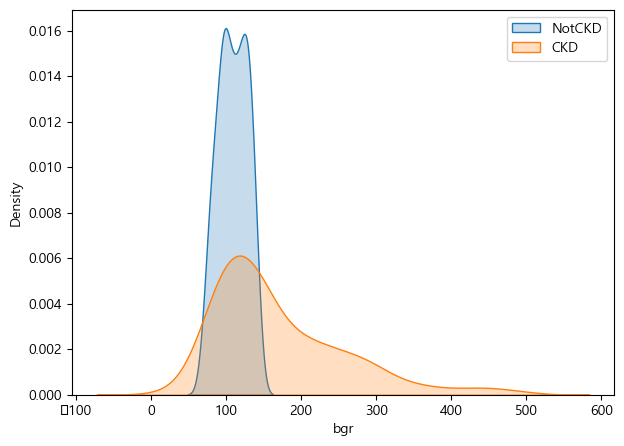

Text(0.5, 1.0, '연령에 따른 당뇨 발생정도')

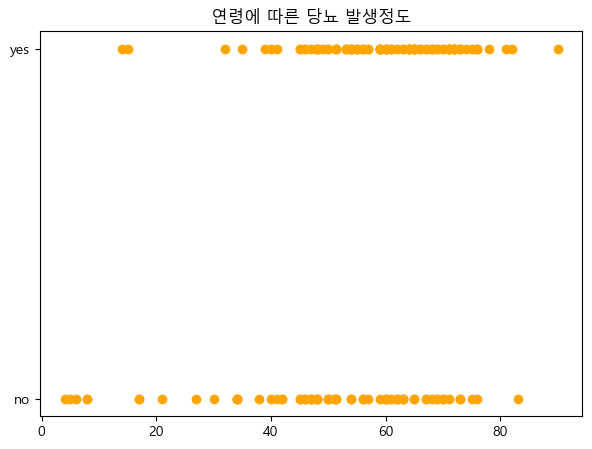

In [439]:
# CKD 여부에 따른 연령별 bgr(Blood Glucose Random), DM

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['bgr'],label='CKD', color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([100,200,300,400,500])
ax1.set_ylim(0,500)
ax1.set_title('CKD 여부에 따른 연령별 혈당수치 분포도')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['bgr'],label='NotCKD', color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([100,200,300,400,500])
ax2.set_ylim(0,500)
ax2.legend(loc='lower right')

kde_plot('bgr')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['dm'],color='orange')
plt.title('연령에 따른 당뇨 발생정도')

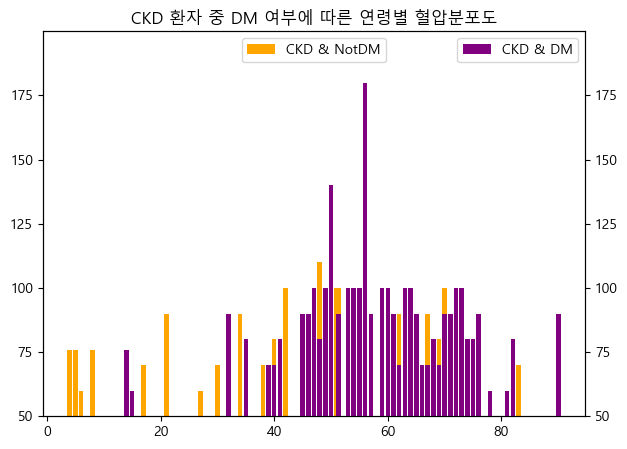

In [440]:
# CKD 환자들 중 DM 여부에 따른 환자들의 연령별 BP분포도

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='ckd') & (df['dm']=='no')]['age'],df[(df['classification']=='ckd') & (df['dm']=='no')]['bp'], label='CKD & NotDM', color='orange')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('CKD 환자 중 DM 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='ckd') & (df['dm']=='yes')]['age'],df[(df['classification']=='ckd') & (df['dm']=='yes')]['bp'], label='CKD & DM', color='purple')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

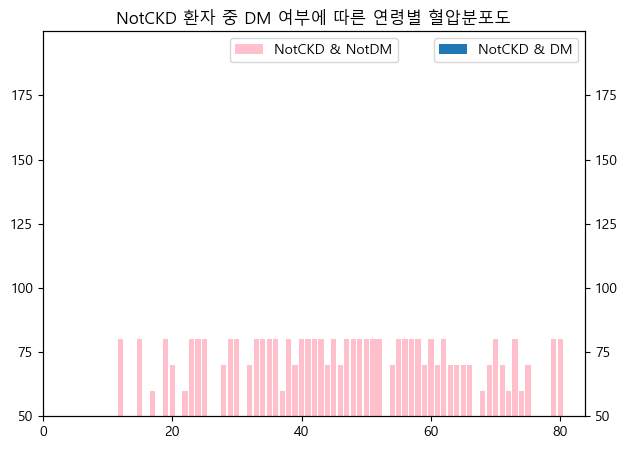

In [441]:
# Not CKD 환자들 중 DM여부에 따른 환자들의 연령별 BP분포도

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='notckd') & (df['dm']=='no')]['age'],df[(df['classification']=='notckd') & (df['dm']=='no')]['bp'], label='NotCKD & NotDM', color='pink')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('NotCKD 환자 중 DM 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='notckd') & (df['dm']=='yes')]['age'],df[(df['classification']=='notckd') & (df['dm']=='yes')]['bp'], label='NotCKD & DM', color='gray')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

In [442]:
# notCKD 환자 중 DM인 환자의 데이터가 존재하지 않음
df[(df['classification']=='notckd') & (df['dm']=='yes')]

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]

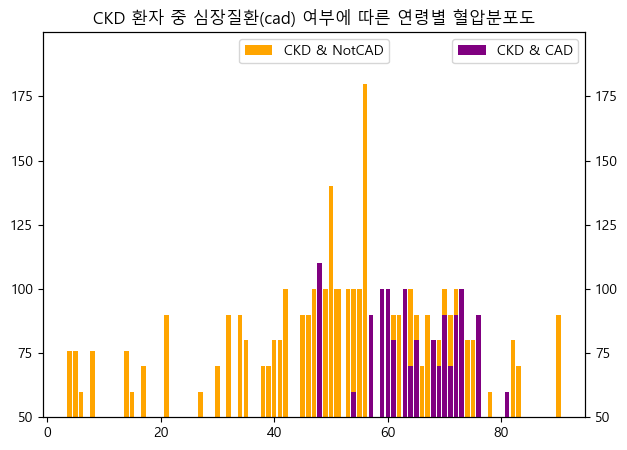

In [443]:
# CKD 환자들 중 심장질환(cad)여부에 따른 환자들의 연령별 BP분포도

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='ckd') & (df['cad']=='no')]['age'],df[(df['classification']=='ckd') & (df['cad']=='no')]['bp'], label='CKD & NotCAD', color='orange')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('CKD 환자 중 심장질환(cad) 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='ckd') & (df['cad']=='yes')]['age'],df[(df['classification']=='ckd') & (df['cad']=='yes')]['bp'], label='CKD & CAD', color='purple')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

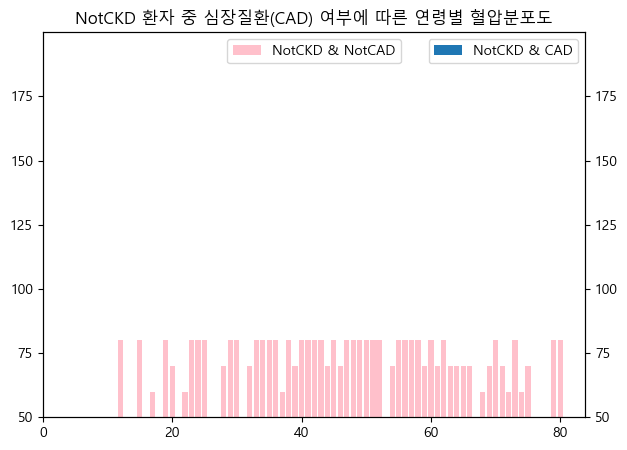

In [444]:
# Not CKD 환자들 중 심장질환(cad)여부에 따른 환자들의 BP데이터

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='notckd') & (df['cad']=='no')]['age'],df[(df['classification']=='notckd') & (df['cad']=='no')]['bp'], label='NotCKD & NotCAD', color='pink')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('NotCKD 환자 중 심장질환(CAD) 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='notckd') & (df['cad']=='yes')]['age'],df[(df['classification']=='notckd') & (df['cad']=='yes')]['bp'], label='NotCKD & CAD', color='gray')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

In [445]:
# NotCKD환자들 가운데 심장질환(cad) 환자 데이터가 존재하지 않음
df[(df['classification']=='notckd') & (df['cad']=='yes')]

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]

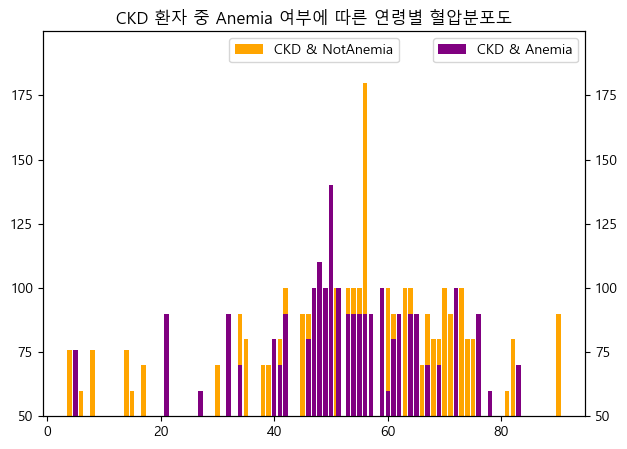

In [446]:
# CKD 환자들 중 Anemia(ane)여부에 따른 환자들의 연령별 BP분포도

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='ckd') & (df['ane']=='no')]['age'],df[(df['classification']=='ckd') & (df['ane']=='no')]['bp'], label='CKD & NotAnemia', color='orange')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('CKD 환자 중 Anemia 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='ckd') & (df['ane']=='yes')]['age'],df[(df['classification']=='ckd') & (df['ane']=='yes')]['bp'], label='CKD & Anemia', color='purple')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

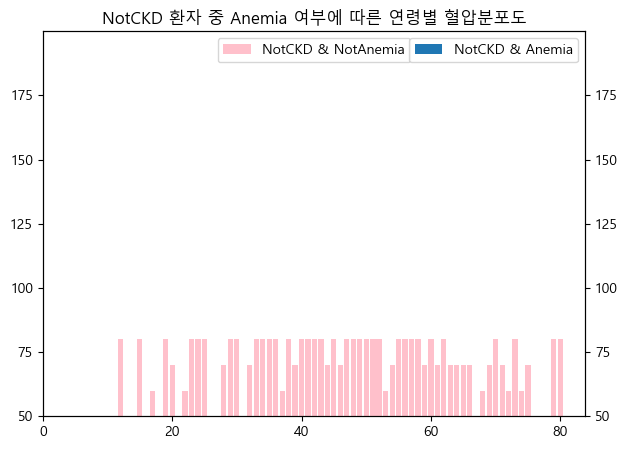

In [447]:
# Not CKD 환자들 중 Anemia(ane)여부에 따른 환자들의 BP데이터

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.bar(df[(df['classification']=='notckd') & (df['ane']=='no')]['age'],df[(df['classification']=='notckd') & (df['ane']=='no')]['bp'], label='NotCKD & NotAnemia', color='pink')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([50,75,100,125,150,175])
ax1.set_ylim(50,200)
ax1.set_title('NotCKD 환자 중 Anemia 여부에 따른 연령별 혈압분포도')
ax1.legend(loc='upper center')

ax2 = ax1.twinx()
ax2.bar(df[(df['classification']=='notckd') & (df['ane']=='yes')]['age'],df[(df['classification']=='notckd') & (df['ane']=='yes')]['bp'], label='NotCKD & Anemia', color='gray')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([50,75,100,125,150,175])
ax2.set_ylim(50,200)
ax2.legend(loc='upper right')

In [448]:
# NotCKD환자들 가운데 Anemia 환자 데이터가 존재하지 않음
df[(df['classification']=='notckd') & (df['ane']=='yes')]

Empty DataFrame
Columns: [age, bp, sg, al, su, rbc, pc, pcc, ba, bgr, bu, sc, sod, pot, hemo, pcv, wc, rc, htn, dm, cad, appet, pe, ane, classification]
Index: []

[0 rows x 25 columns]

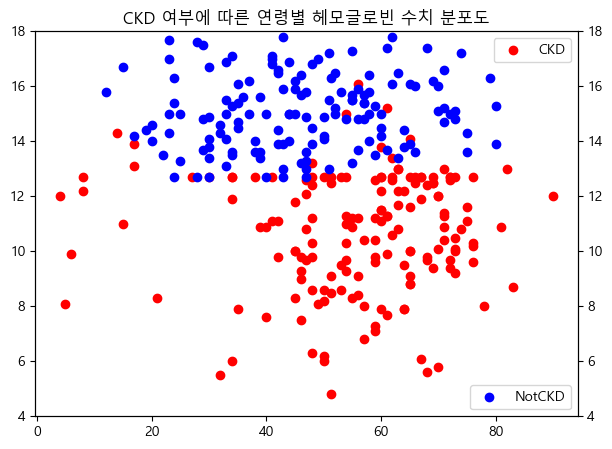

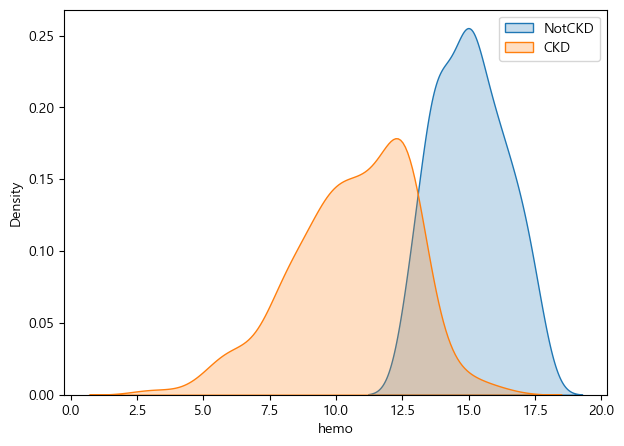

Text(0.5, 1.0, '연령에 따른 Anemia 발생정도')

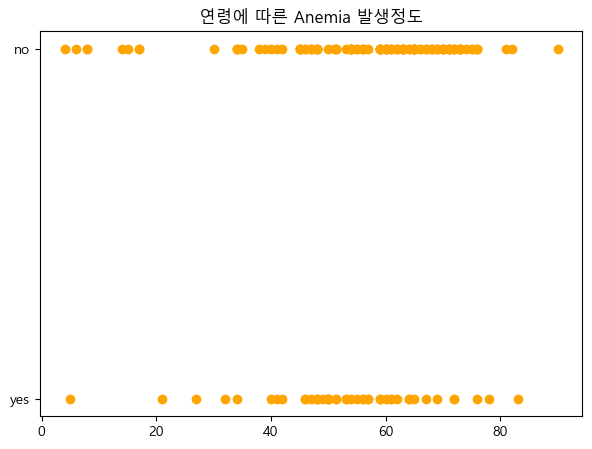

In [449]:
# CKD 여부에 따른 연령별 hemoblobin

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['hemo'], label='CKD',color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([4,6,8,10,12,14,16,18])
ax1.set_ylim(4,18)
ax1.set_title('CKD 여부에 따른 연령별 헤모글로빈 수치 분포도')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['hemo'], label='NotCKD', color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([4,6,8,10,12,14,16,18])
ax2.set_ylim(4,18)
ax2.legend(loc='lower right')

kde_plot('hemo')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['ane'],color='orange')
plt.title('연령에 따른 Anemia 발생정도')

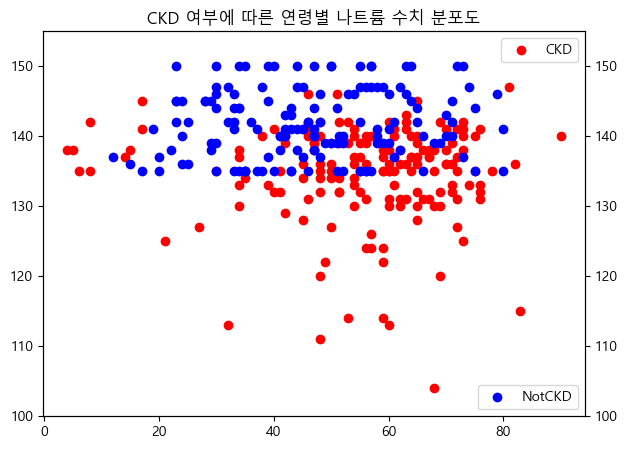

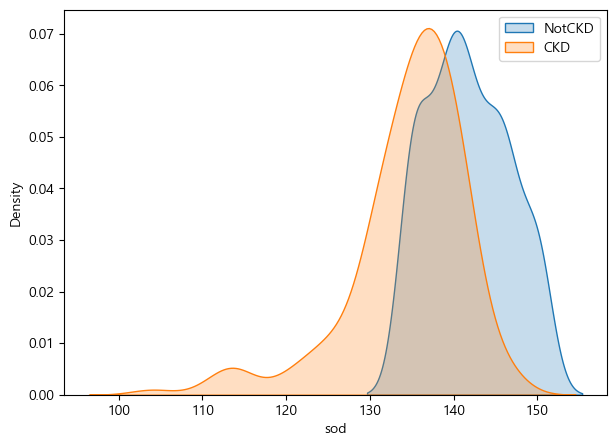

Text(0.5, 1.0, 'CKD 여부에 따른 부종발생 환자수')

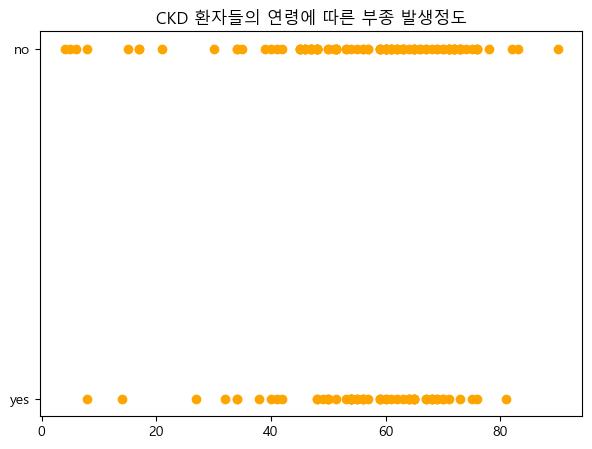

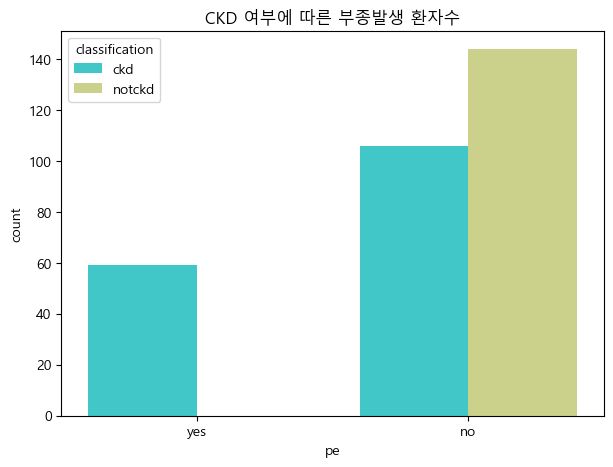

In [450]:
# CKD 여부에 따른 연령별 sod(Sodium), pe(Pedal Edema) 발생 수

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['sod'],label='CKD', color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([100,110,120,130,140,150,160])
ax1.set_ylim(100,155)
ax1.set_title('CKD 여부에 따른 연령별 나트륨 수치 분포도')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax2.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['sod'],label='NotCKD',color='blue')
ax2.set_xticks([0,20,40,60,80])
ax2.set_yticks([100,110,120,130,140,150,160])
ax2.set_ylim(100,155)
ax2.legend(loc='lower right')

kde_plot('sod')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['pe'],color='orange')
plt.title('CKD 환자들의 연령에 따른 부종 발생정도')

plt.figure(figsize=(7,5))
sns.countplot(x=df['pe'], hue=df['classification'], palette='rainbow')
plt.title('CKD 여부에 따른 부종발생 환자수')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


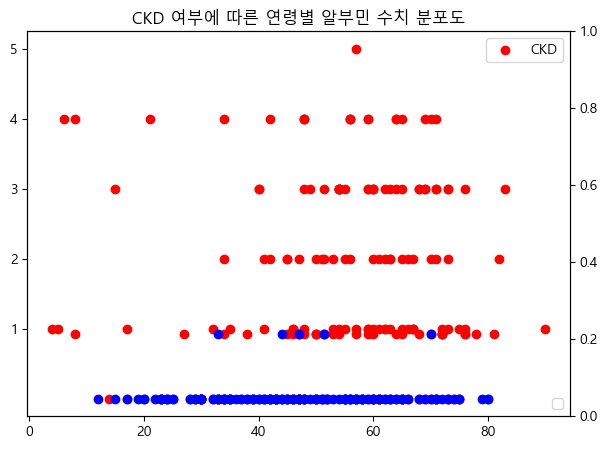

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


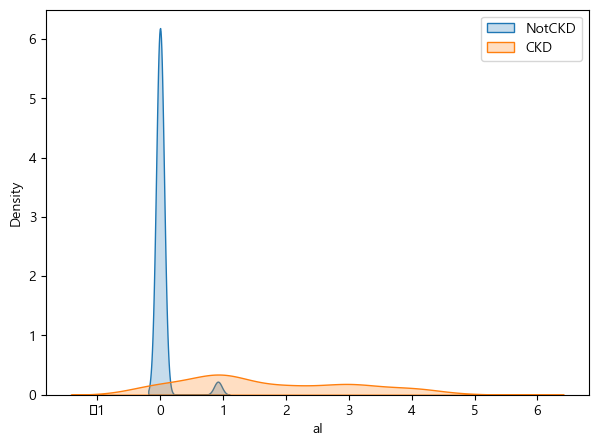

Text(0.5, 1.0, '식욕정도에 따른 박테리아 검출된 환자 수')

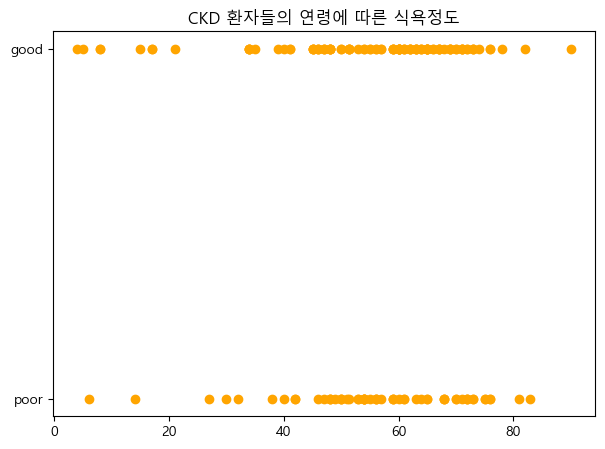

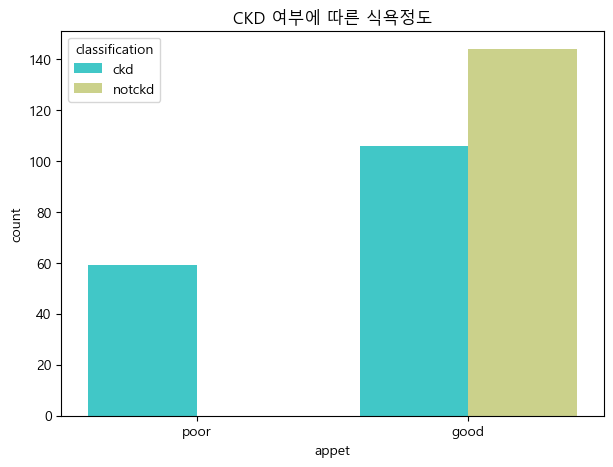

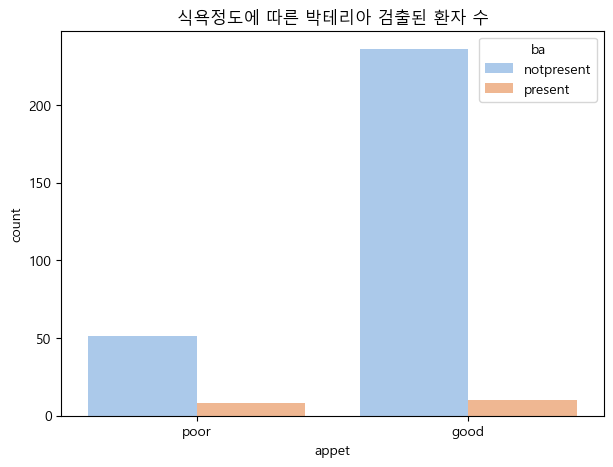

In [451]:
# CKD 여부에 따른 연령별 al(albumin), appet(appetite) 

fig,ax1 = plt.subplots(figsize=(7,5))

ax1.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['al'],label='CKD', color='red')
ax1.set_xticks([0,20,40,60,80])
ax1.set_yticks([1,2,3,4,5])
ax1.set_title('CKD 여부에 따른 연령별 알부민 수치 분포도')
ax1.legend(loc='upper right')

ax2 = ax1.twinx()
ax1.scatter(df[df['classification']=='notckd']['age'],df[df['classification']=='notckd']['al'],label='NotCKD',color='blue')
ax2.set_xticks([0,20,40,60,80])
ax1.set_yticks([1,2,3,4,5])
ax2.legend(loc='lower right')

kde_plot('al')

plt.figure(figsize=(7,5))
plt.scatter(df[df['classification']=='ckd']['age'],df[df['classification']=='ckd']['appet'],color='orange')
plt.title('CKD 환자들의 연령에 따른 식욕정도')

plt.figure(figsize=(7,5))
sns.countplot(x=df['appet'], hue=df['classification'], palette='rainbow')
plt.title('CKD 여부에 따른 식욕정도')

plt.figure(figsize=(7,5))
sns.countplot(x=df['appet'], hue=df['ba'], palette='pastel')
plt.title('식욕정도에 따른 박테리아 검출된 환자 수')

#### 4. 상관도별 분석

In [452]:
df_obj_fill =df[obj_cols].fillna('normal')
df_obj_fill

rbc        pc         pcc          ba  htn   dm cad appet   pe  ane  \
3      normal  abnormal     present  notpresent  yes   no  no  poor  yes  yes   
5      normal    normal  notpresent  notpresent  yes  yes  no  good  yes   no   
6      normal    normal  notpresent  notpresent   no   no  no  good   no   no   
9    abnormal  abnormal     present  notpresent  yes  yes  no  poor   no  yes   
11   abnormal  abnormal     present  notpresent  yes  yes  no  poor  yes   no   
..        ...       ...         ...         ...  ...  ...  ..   ...  ...  ...   
395    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
396    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
397    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
398    normal    normal  notpresent  notpresent   no   no  no  good   no   no   
399    normal    normal  notpresent  notpresent   no   no  no  good   no   no   

    classification  
3              ckd  
5              ckd  
6              ckd  
9              ckd  
11             ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[310 rows x 11 columns]

In [453]:
df_obj_fill['rbc'] = df_obj_fill['rbc'].map({'normal':0, 'abnormal':1})
df_obj_fill['pc'] = df_obj_fill['pc'].map({'normal':0, 'abnormal':1})
df_obj_fill['pcc'] = df_obj_fill['pcc'].map({'present':1, 'notpresent':0})
df_obj_fill['ba'] = df_obj_fill['ba'].map({'present':1, 'notpresent':0})
df_obj_fill['classification'] = df_obj_fill['classification'].map({'notckd':0, 'ckd':1})
df_obj_fill['appet'] = df_obj_fill['appet'].map({'good':0, 'poor':1})

temp = ['htn', 'dm', 'cad','pe', 'ane']
for i, col in enumerate(temp):
    df_obj_fill[col] = df_obj_fill[col].map({'no':0,'yes':1})

df_obj_fill

rbc  pc  pcc   ba  htn   dm  cad  appet   pe  ane  classification
3      0   1  1.0  0.0  1.0  0.0  0.0    1.0  1.0  1.0               1
5      0   0  0.0  0.0  1.0  1.0  0.0    0.0  1.0  0.0               1
6      0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               1
9      1   1  1.0  0.0  1.0  1.0  0.0    1.0  0.0  1.0               1
11     1   1  1.0  0.0  1.0  1.0  0.0    1.0  1.0  0.0               1
..   ...  ..  ...  ...  ...  ...  ...    ...  ...  ...             ...
395    0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0
396    0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0
397    0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0
398    0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0
399    0   0  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0

[310 rows x 11 columns]

In [454]:
df_fill = df[num_cols].fillna(df[num_cols].mean())
df_fill

age    bp     sg   al   su    bgr     bu    sc    sod  pot  hemo   pcv  \
3    48.0  70.0  1.005  4.0  0.0  117.0   56.0   3.8  111.0  2.5  11.2  32.0   
5    60.0  90.0  1.015  3.0  0.0   74.0   25.0   1.1  142.0  3.2  12.2  39.0   
6    68.0  70.0  1.010  0.0  0.0  100.0   54.0  24.0  104.0  4.0  12.4  36.0   
9    53.0  90.0  1.020  2.0  0.0   70.0  107.0   7.2  114.0  3.7   9.5  29.0   
11   63.0  70.0  1.010  3.0  0.0  380.0   60.0   2.7  131.0  4.2  10.8  32.0   
..    ...   ...    ...  ...  ...    ...    ...   ...    ...  ...   ...   ...   
395  55.0  80.0  1.020  0.0  0.0  140.0   49.0   0.5  150.0  4.9  15.7  47.0   
396  42.0  70.0  1.025  0.0  0.0   75.0   31.0   1.2  141.0  3.5  16.5  54.0   
397  12.0  80.0  1.020  0.0  0.0  100.0   26.0   0.6  137.0  4.4  15.8  49.0   
398  17.0  60.0  1.025  0.0  0.0  114.0   50.0   1.0  135.0  4.9  14.2  51.0   
399  58.0  80.0  1.025  0.0  0.0  131.0   18.0   1.1  141.0  3.5  15.8  53.0   

               wc       rc  
3     6700.000000  3.90000  
5     7800.000000  4.40000  
6     8454.285714  4.73038  
9    12100.000000  3.70000  
11    4500.000000  3.80000  
..            ...      ...  
395   6700.000000  4.90000  
396   7800.000000  6.20000  
397   6600.000000  5.40000  
398   7200.000000  5.90000  
399   6800.000000  6.10000  

[310 rows x 14 columns]

In [455]:
new_df = df_fill.join(df_obj_fill)

In [456]:
# 상관도 측정
new_df.corr()

age        bp        sg        al        su       bgr  \
age             1.000000  0.127047 -0.221425  0.178037  0.232581  0.269205   
bp              0.127047  1.000000 -0.170383  0.194686  0.273565  0.189111   
sg             -0.221425 -0.170383  1.000000 -0.546565 -0.345244 -0.362652   
al              0.178037  0.194686 -0.546565  1.000000  0.322471  0.357183   
su              0.232581  0.273565 -0.345244  0.322471  1.000000  0.689433   
bgr             0.269205  0.189111 -0.362652  0.357183  0.689433  1.000000   
bu              0.167430  0.211896 -0.350629  0.504022  0.161372  0.151329   
sc              0.129109  0.258168 -0.415249  0.456558  0.218704  0.139487   
sod            -0.127318 -0.111086  0.419895 -0.445851 -0.156143 -0.265471   
pot             0.101032  0.088586  0.048057  0.102834  0.039942 -0.008013   
hemo           -0.192479 -0.311899  0.553655 -0.594402 -0.210236 -0.285733   
pcv            -0.229726 -0.322106  0.559726 -0.578797 -0.238658 -0.298661   
wc              0.130442  0.050025 -0.231229  0.219177  0.218098  0.162396   
rc             -0.219563 -0.231744  0.521106 -0.504769 -0.240918 -0.270638   
rbc             0.023701  0.194458 -0.318308  0.424422  0.148751  0.227811   
pc              0.108677  0.182366 -0.379309  0.615876  0.161919  0.283574   
pcc             0.136342  0.094537 -0.285691  0.436467  0.117527  0.220457   
ba              0.037349  0.143300 -0.308509  0.437623  0.147076  0.130185   
htn             0.397022  0.296693 -0.460692  0.584493  0.367702  0.452505   
dm              0.349776  0.251128 -0.455763  0.457531  0.461942  0.510408   
cad             0.273476  0.126218 -0.180830  0.301682  0.358693  0.308709   
appet           0.149847  0.218233 -0.302395  0.411614  0.144923  0.187264   
pe              0.135383  0.094333 -0.336192  0.495645  0.165658  0.147669   
ane             0.046295  0.223290 -0.237370  0.348858  0.026724  0.063628   
classification  0.278106  0.313127 -0.684488  0.654003  0.365174  0.425542   

                      bu        sc       sod       pot  ...        pc  \
age             0.167430  0.129109 -0.127318  0.101032  ...  0.108677   
bp              0.211896  0.258168 -0.111086  0.088586  ...  0.182366   
sg             -0.350629 -0.415249  0.419895  0.048057  ... -0.379309   
al              0.504022  0.456558 -0.445851  0.102834  ...  0.615876   
su              0.161372  0.218704 -0.156143  0.039942  ...  0.161919   
bgr             0.151329  0.139487 -0.265471 -0.008013  ...  0.283574   
bu              1.000000  0.776897 -0.443741  0.234227  ...  0.400414   
sc              0.776897  1.000000 -0.486191  0.211373  ...  0.321786   
sod            -0.443741 -0.486191  1.000000  0.025842  ... -0.357311   
pot             0.234227  0.211373  0.025842  1.000000  ...  0.069591   
hemo           -0.617025 -0.581865  0.485536 -0.160317  ... -0.465020   
pcv            -0.594525 -0.567099  0.486682 -0.209311  ... -0.464352   
wc              0.030576  0.024942 -0.046629 -0.105479  ...  0.101697   
rc             -0.509748 -0.493787  0.407294 -0.167065  ... -0.437668   
rbc             0.367129  0.355815 -0.264743  0.021767  ...  0.439284   
pc              0.400414  0.321786 -0.357311  0.069591  ...  1.000000   
pcc             0.217930  0.140894 -0.283821  0.063168  ...  0.538906   
ba              0.175374  0.113913 -0.145766  0.069095  ...  0.447214   
htn             0.466390  0.405023 -0.426616  0.146900  ...  0.353251   
dm              0.391046  0.372811 -0.358475  0.136829  ...  0.280914   
cad             0.254736  0.174099 -0.161291  0.133632  ...  0.215285   
appet           0.343626  0.272964 -0.302294  0.074338  ...  0.405060   
pe              0.384528  0.343162 -0.308128  0.079790  ...  0.427240   
ane             0.514550  0.484667 -0.355562  0.116698  ...  0.310733   
classification  0.473361  0.500261 -0.510889  0.051852  ...  0.415985   

                     pcc        ba       htn        dm       cad     appet  \
age            

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


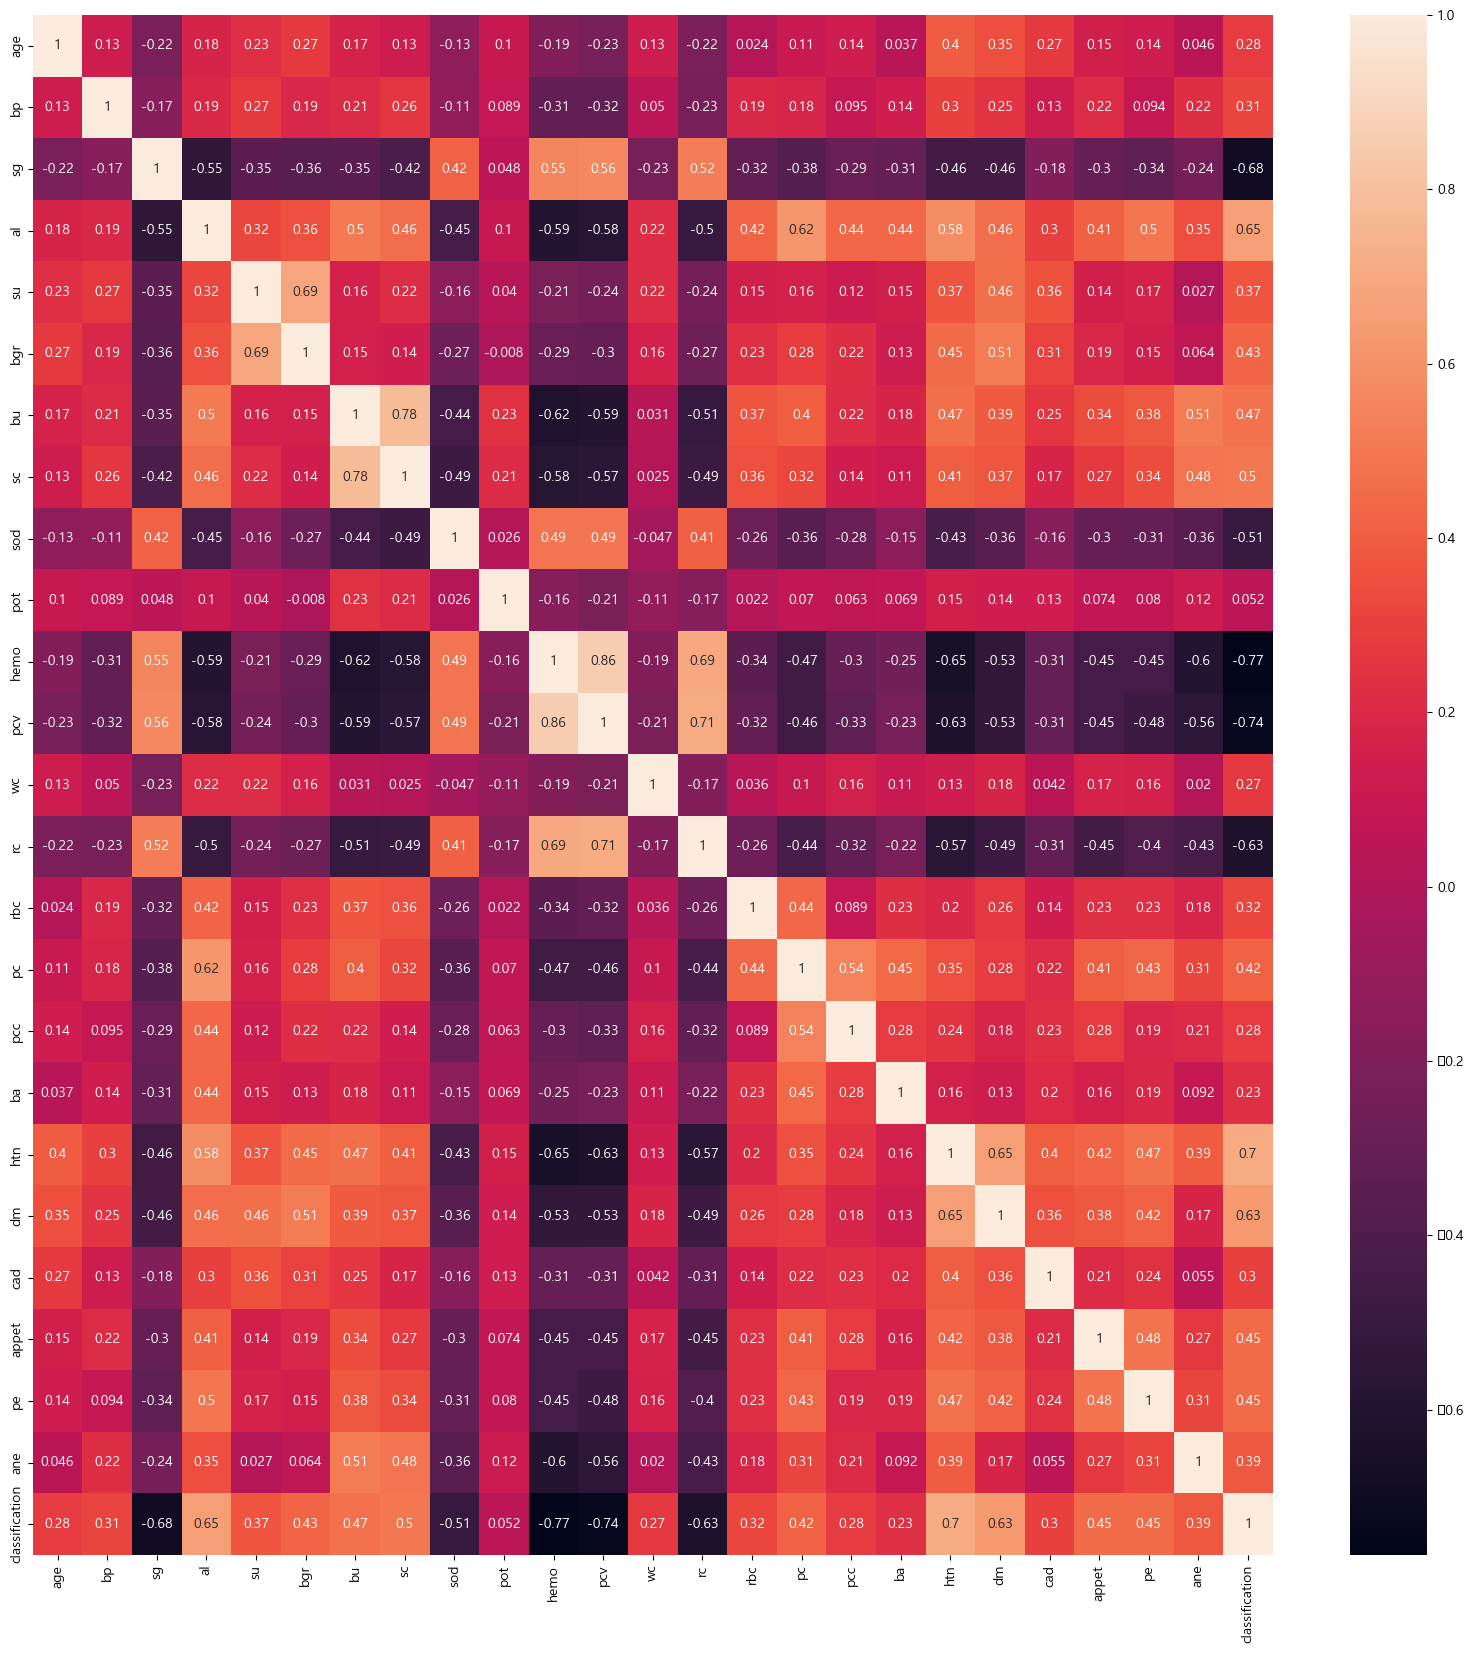

In [457]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.corr(),annot=True, annot_kws={'size':10})

In [458]:
# 전체 상관관계가 높은 수치를 갖는 항목 검토
# sg, bu, hemo(pcv)

C:\Users\user\AppData\Local\Temp\ipykernel_13320\1767371857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sg'], x=df['classification'], palette='autumn', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\1767371857.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bu'], x=df['classification'], palette='gist_heat', ax=ax[1])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\catego

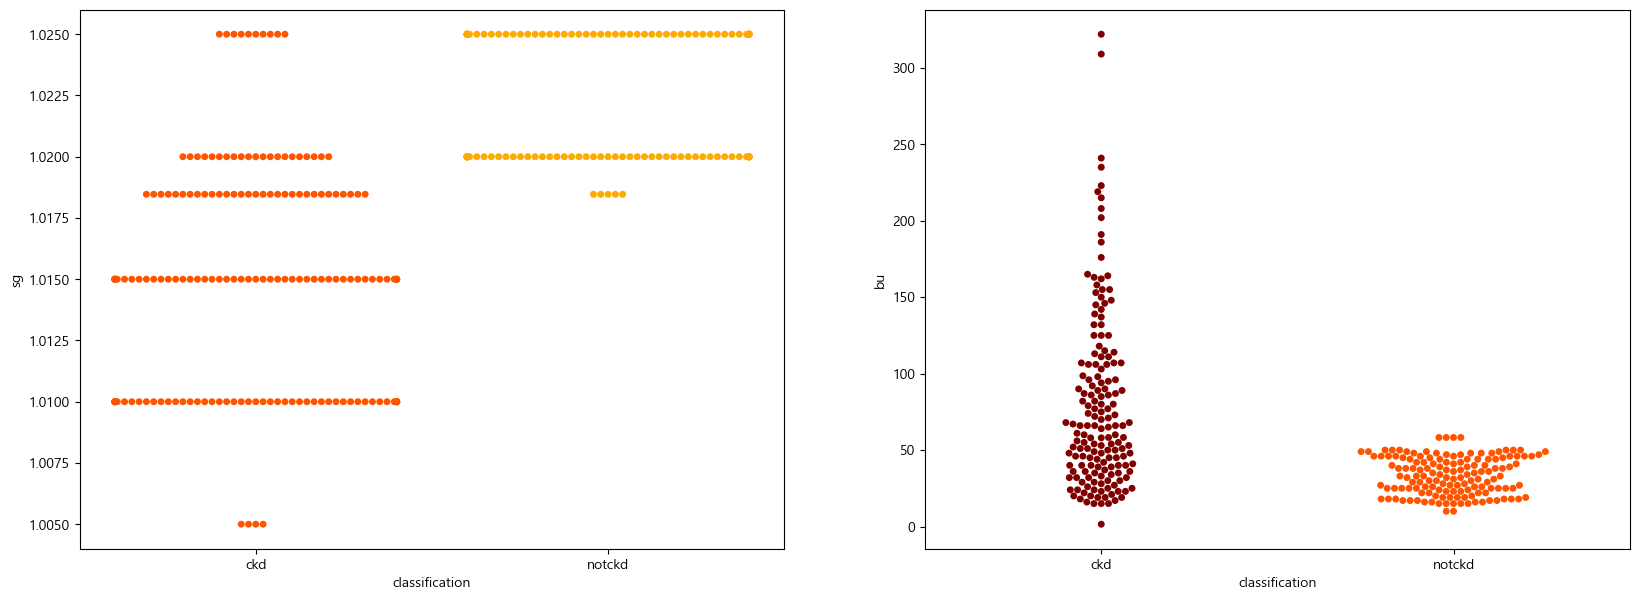

In [459]:
# CKD 여부에 따른 sg와 bu 범주
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
sns.swarmplot(y=df['sg'], x=df['classification'], palette='autumn', ax=ax[0])
sns.swarmplot(y=df['bu'], x=df['classification'], palette='gist_heat', ax=ax[1])
plt.show()

<Axes: xlabel='sg', ylabel='bu'>

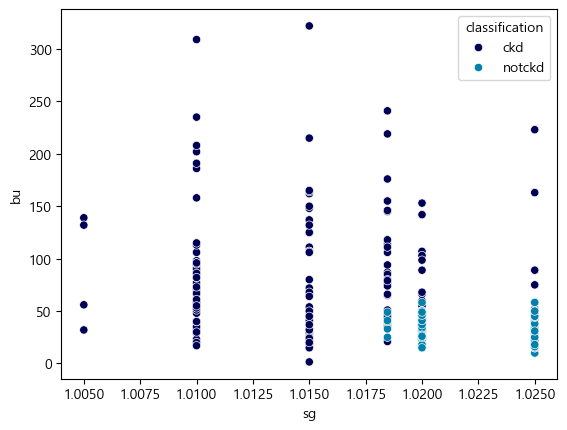

In [460]:
# CKD 여부에 따른 sg와 bu의 분포도
sns.scatterplot(data=df, x=df['sg'],y=df['bu'], hue='classification', palette='ocean')

C:\Users\user\AppData\Local\Temp\ipykernel_13320\1054232537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sg'], x=df['classification'], palette='autumn', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\1054232537.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['hemo'], x=df['classification'], palette='Reds', ax=ax[1])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categoric

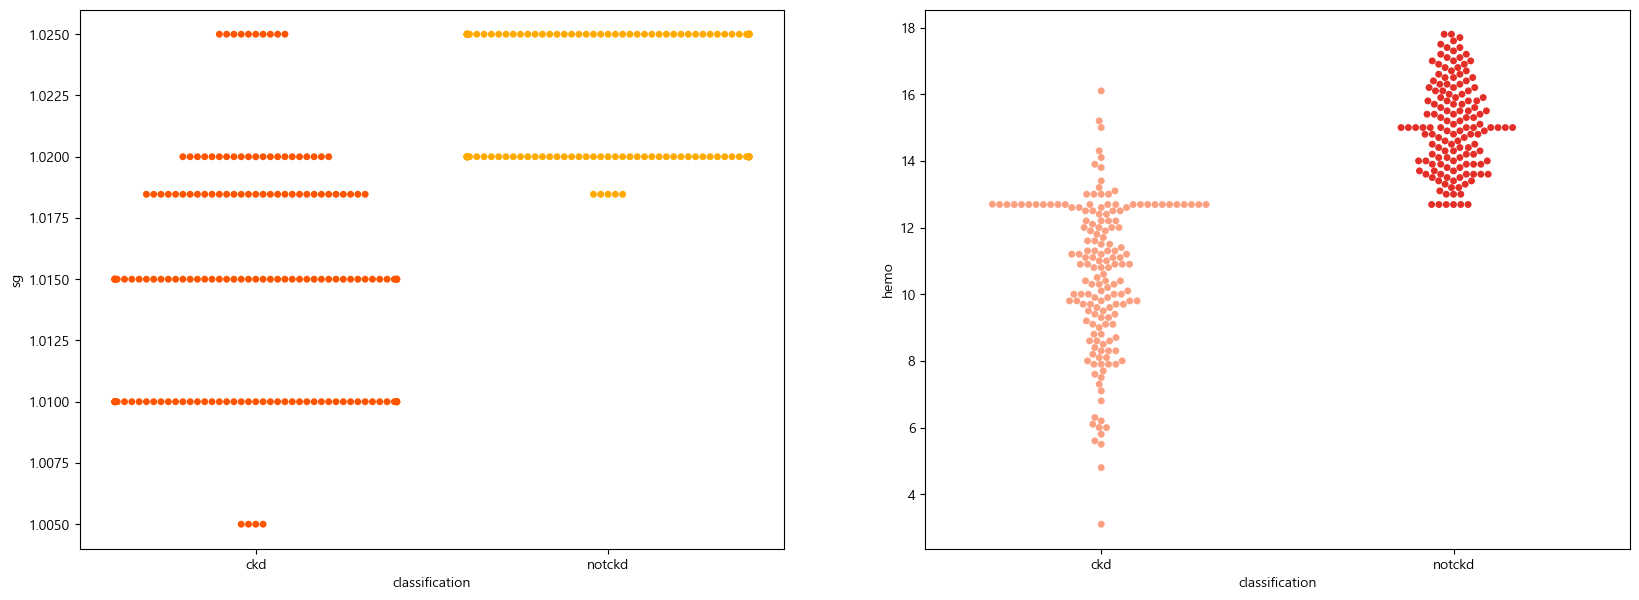

In [461]:
# CKD 여부에 따른 sg와 hemo 범주
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
sns.swarmplot(y=df['sg'], x=df['classification'], palette='autumn', ax=ax[0])
sns.swarmplot(y=df['hemo'], x=df['classification'], palette='Reds', ax=ax[1])
plt.show()

<Axes: xlabel='sg', ylabel='hemo'>

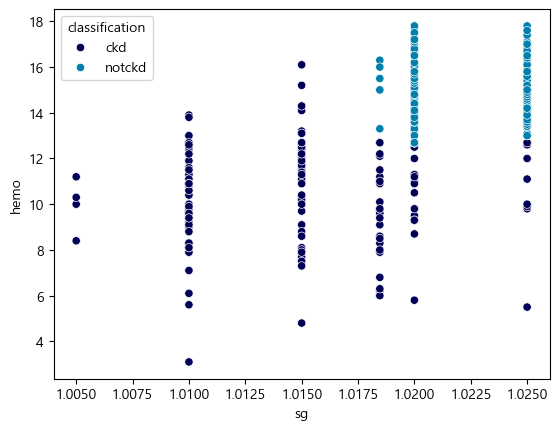

In [462]:
# CKD 여부에 따른 sg와 hemo의 값 분포도
sns.scatterplot(data=df, x=df['sg'],y=df['hemo'], hue='classification', palette='ocean')

C:\Users\user\AppData\Local\Temp\ipykernel_13320\837452680.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bu'], x=df['classification'], palette='gist_heat', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\837452680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['hemo'], x=df['classification'], palette='Reds', ax=ax[1])


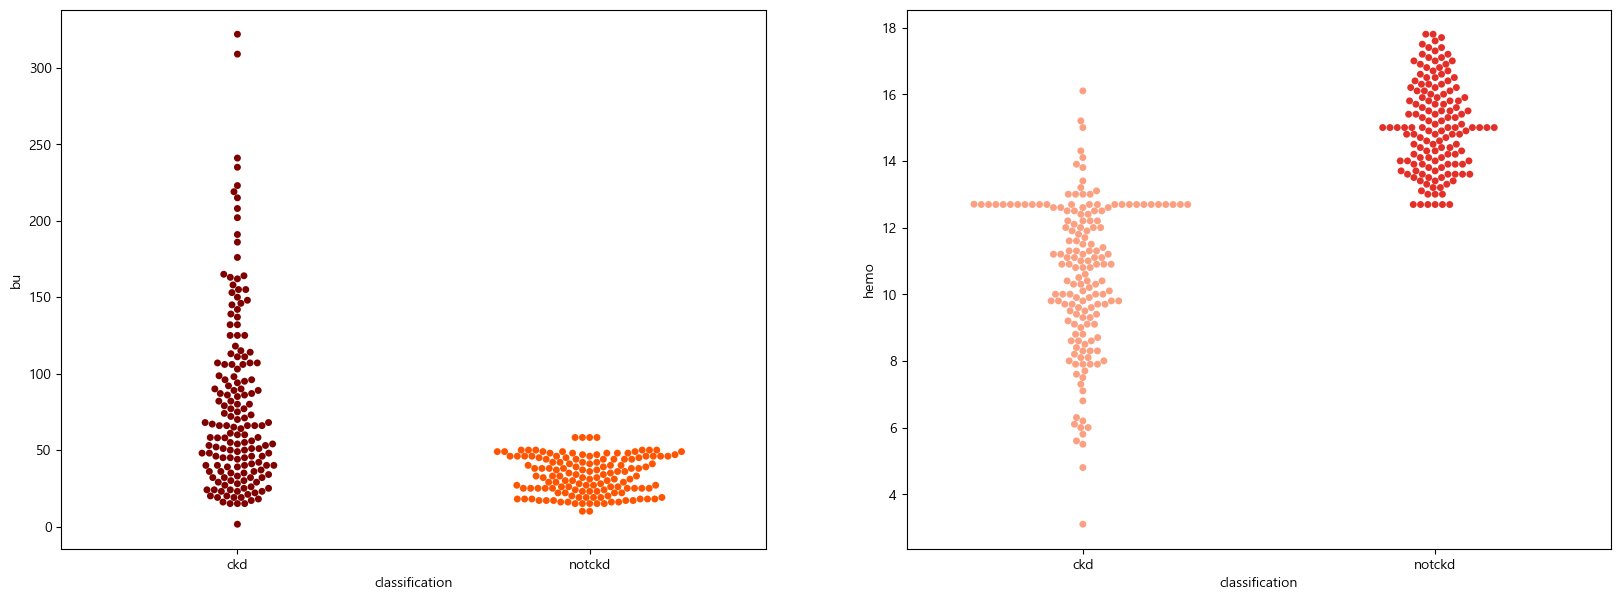

In [463]:
# CKD 여부에 따른 bu와 hemo범주
fig, ax = plt.subplots(ncols=2, figsize=(20,7))
sns.swarmplot(y=df['bu'], x=df['classification'], palette='gist_heat', ax=ax[0])
sns.swarmplot(y=df['hemo'], x=df['classification'], palette='Reds', ax=ax[1])
plt.show()

<Axes: xlabel='hemo', ylabel='bu'>

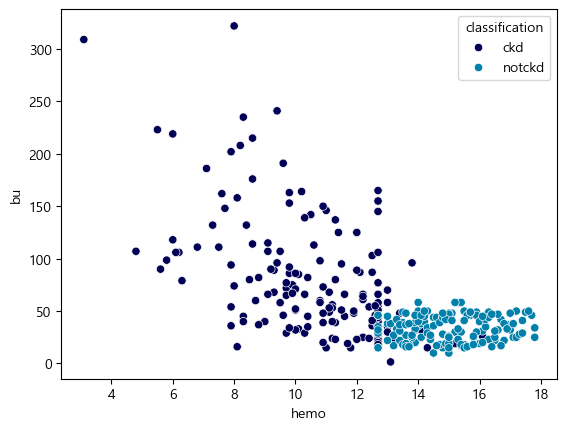

In [464]:
# CKD 여부에 따른 bu와 hemo의 값 분포도
sns.scatterplot(data=df, x=df['hemo'],y=df['bu'], hue='classification', palette='ocean')

#### 5. 검사 종류에 따른 분석

In [465]:
# 혈액검사 수치에 따른 관계도
blood = ['rbc', 'pc', 'bgr','sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'classification']
new_df[blood]

rbc  pc    bgr    sod  pot  hemo   pcv            wc       rc  \
3      0   1  117.0  111.0  2.5  11.2  32.0   6700.000000  3.90000   
5      0   0   74.0  142.0  3.2  12.2  39.0   7800.000000  4.40000   
6      0   0  100.0  104.0  4.0  12.4  36.0   8454.285714  4.73038   
9      1   1   70.0  114.0  3.7   9.5  29.0  12100.000000  3.70000   
11     1   1  380.0  131.0  4.2  10.8  32.0   4500.000000  3.80000   
..   ...  ..    ...    ...  ...   ...   ...           ...      ...   
395    0   0  140.0  150.0  4.9  15.7  47.0   6700.000000  4.90000   
396    0   0   75.0  141.0  3.5  16.5  54.0   7800.000000  6.20000   
397    0   0  100.0  137.0  4.4  15.8  49.0   6600.000000  5.40000   
398    0   0  114.0  135.0  4.9  14.2  51.0   7200.000000  5.90000   
399    0   0  131.0  141.0  3.5  15.8  53.0   6800.000000  6.10000   

     classification  
3                 1  
5                 1  
6                 1  
9                 1  
11                1  
..              ...  
395               0  
396               0  
397               0  
398               0  
399               0  

[310 rows x 10 columns]

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


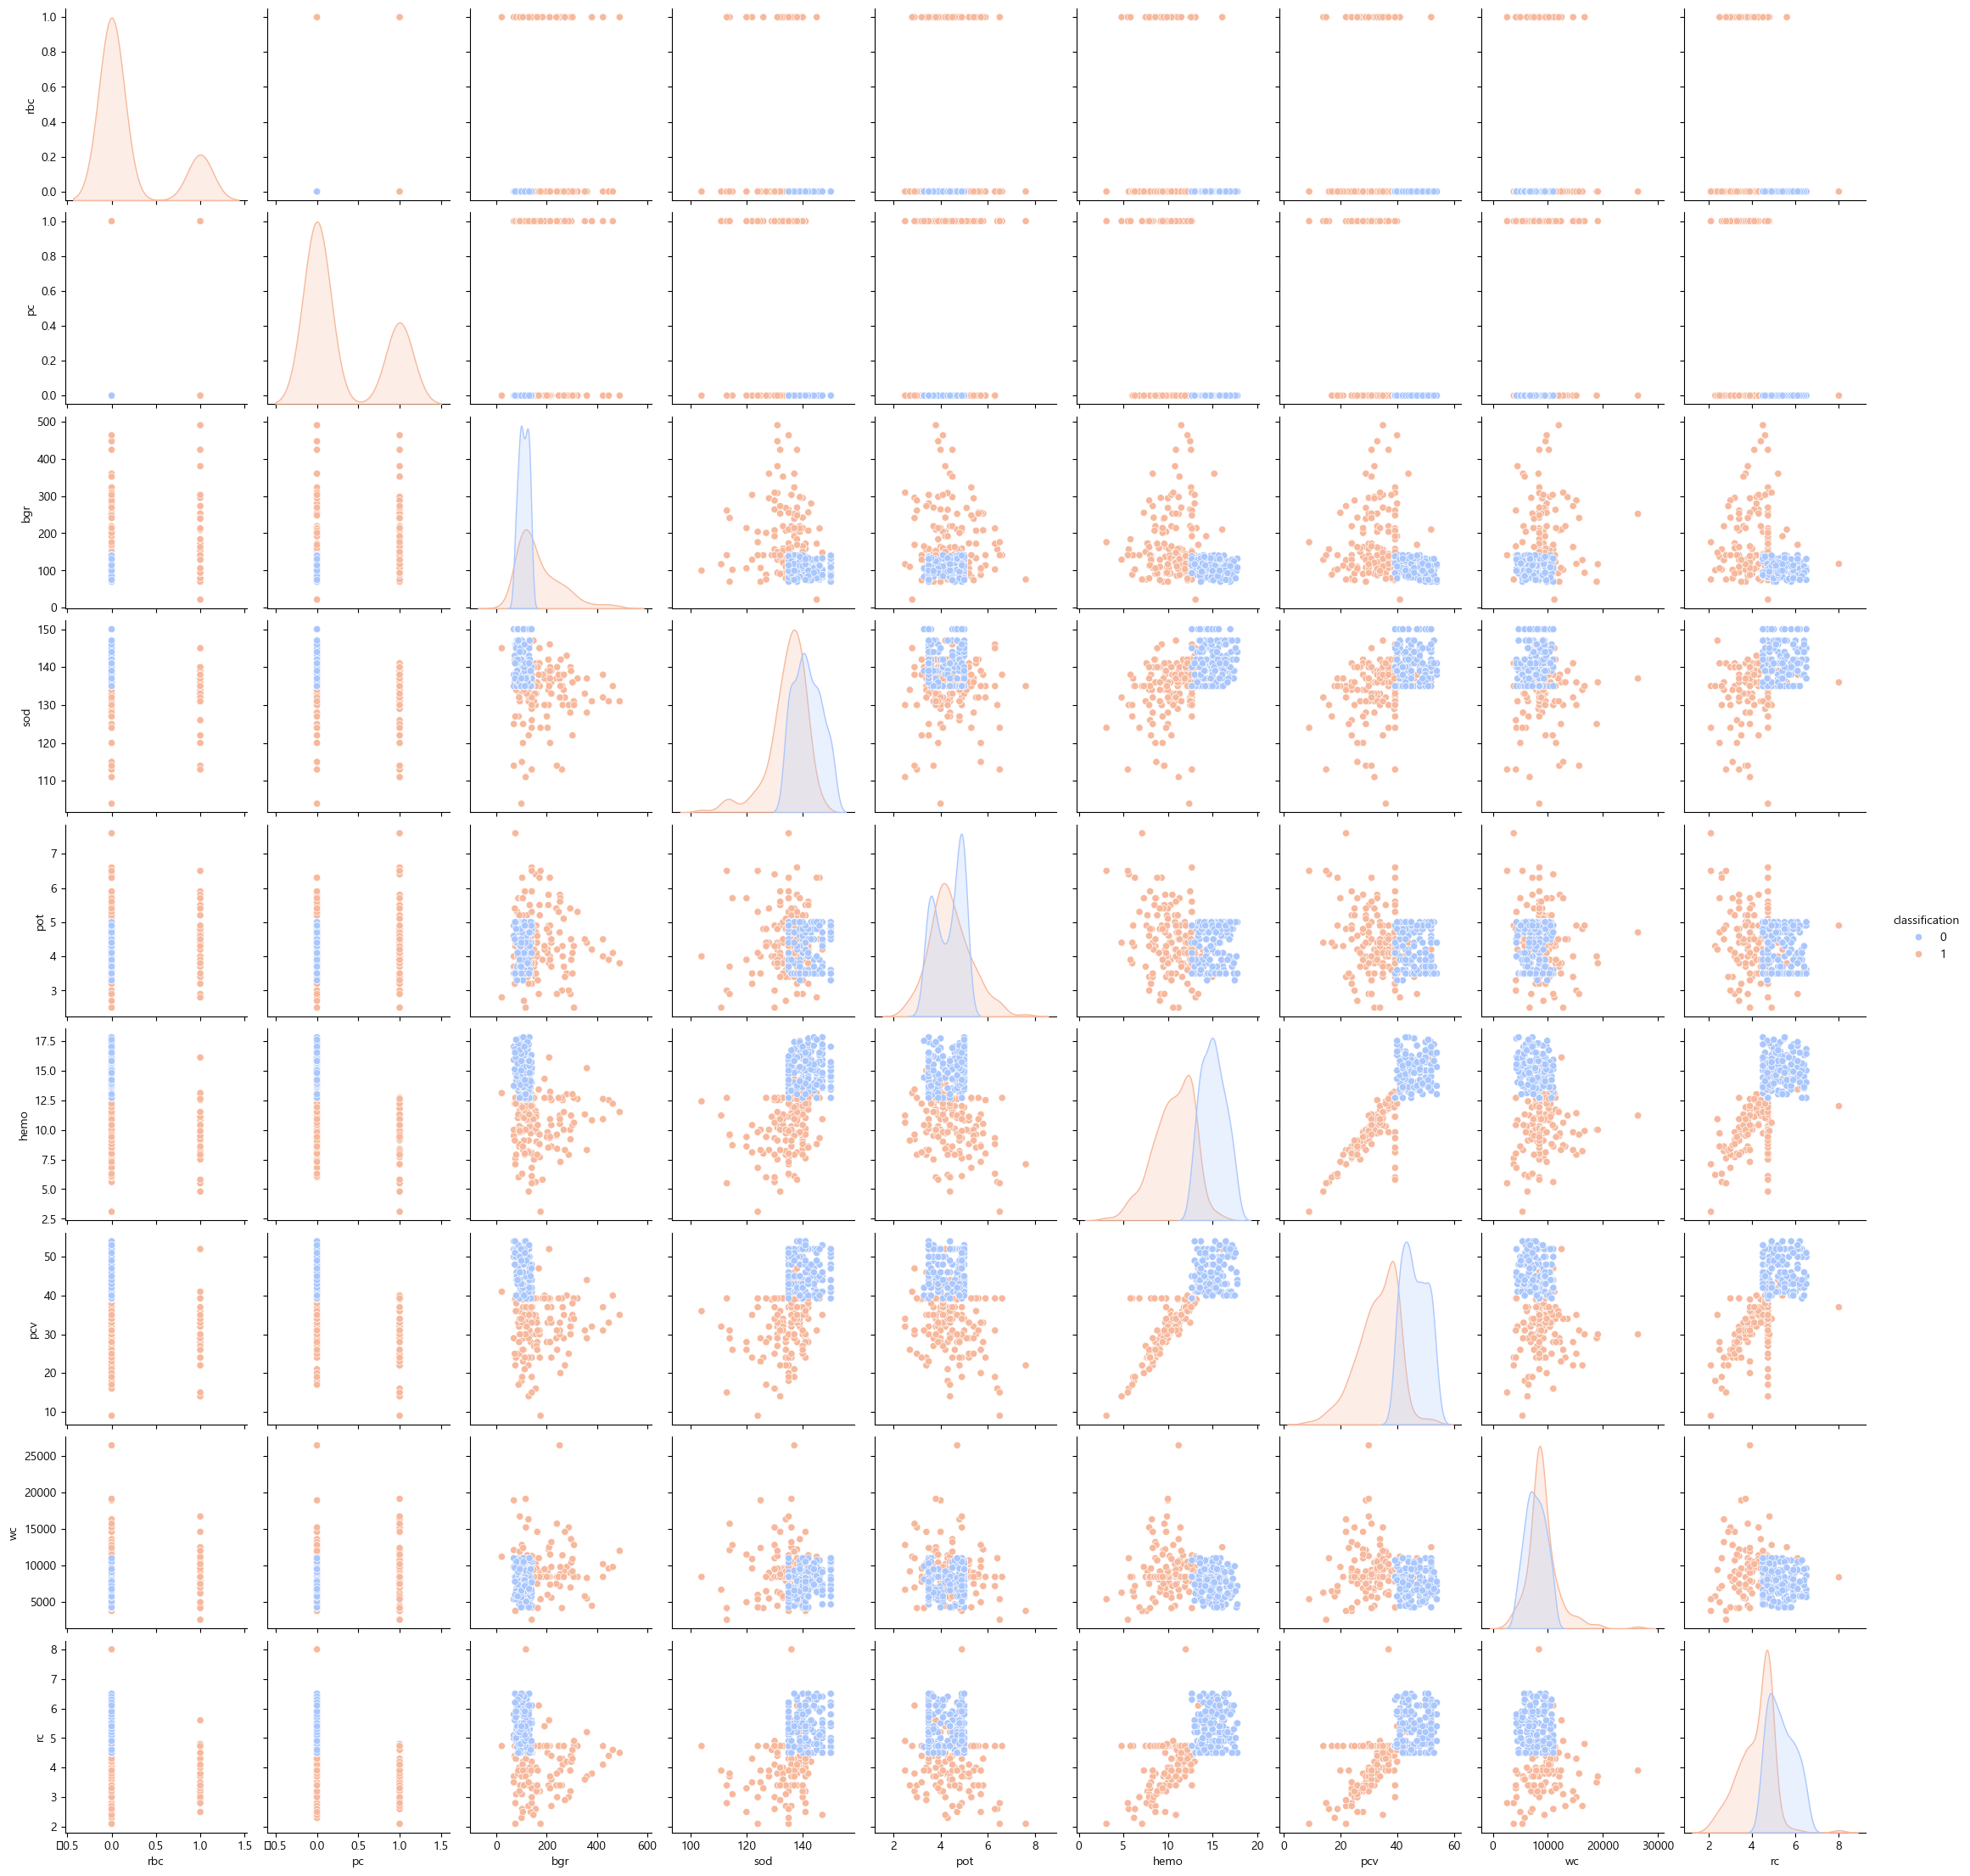

In [466]:
sns.pairplot(new_df[blood], hue='classification', diag_kind="kde", palette='coolwarm')

C:\Users\user\AppData\Local\Temp\ipykernel_13320\647927471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['hemo'], x=df['rbc'], palette='Reds', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\647927471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['pcv'], x=df['rbc'], palette='Reds', ax=ax[1])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\647927471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['wc'], x=df['rbc'], palette='Reds', ax=ax[2])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\647

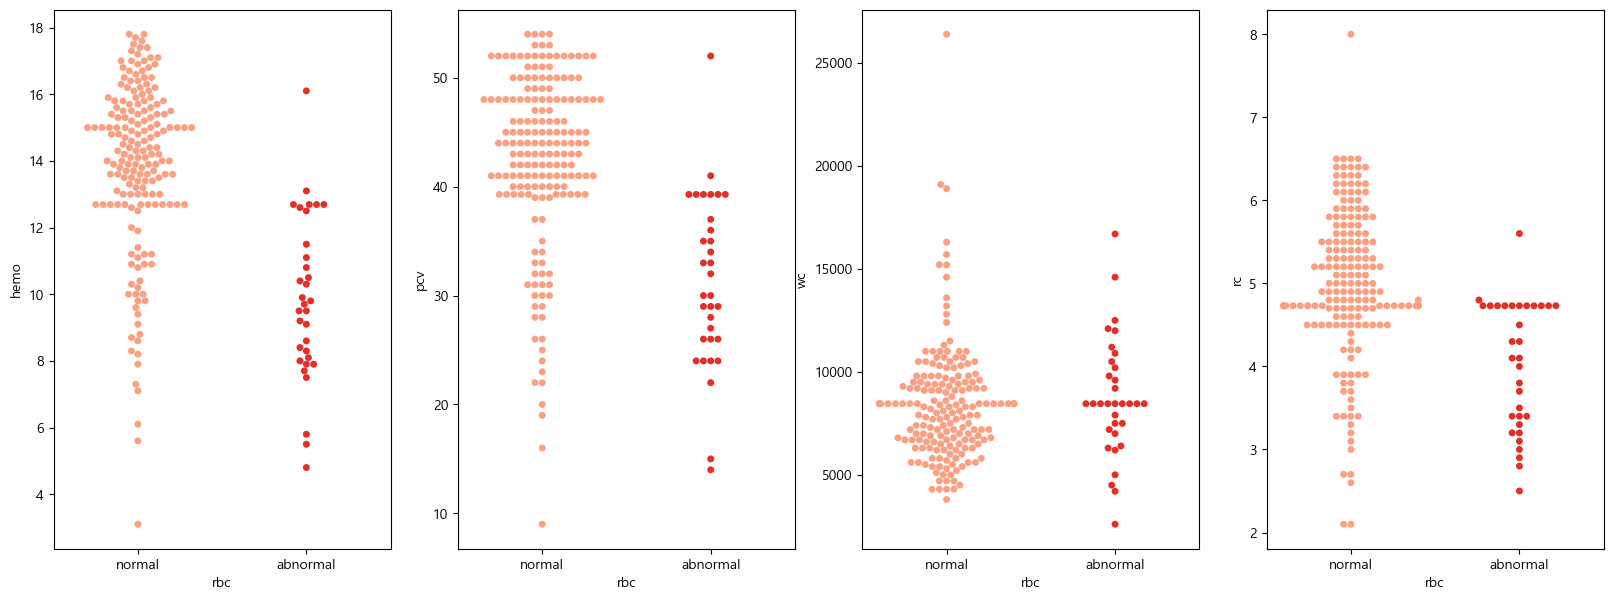

In [467]:
# rbc 정상 여부에 따른 혈구검사
fig, ax = plt.subplots(ncols=4, figsize=(20,7))
sns.swarmplot(y=df['hemo'], x=df['rbc'], palette='Reds', ax=ax[0])
sns.swarmplot(y=df['pcv'], x=df['rbc'], palette='Reds', ax=ax[1])
sns.swarmplot(y=df['wc'], x=df['rbc'], palette='Reds', ax=ax[2])
sns.swarmplot(y=df['rc'], x=df['rbc'], palette='Reds', ax=ax[3])
plt.show()

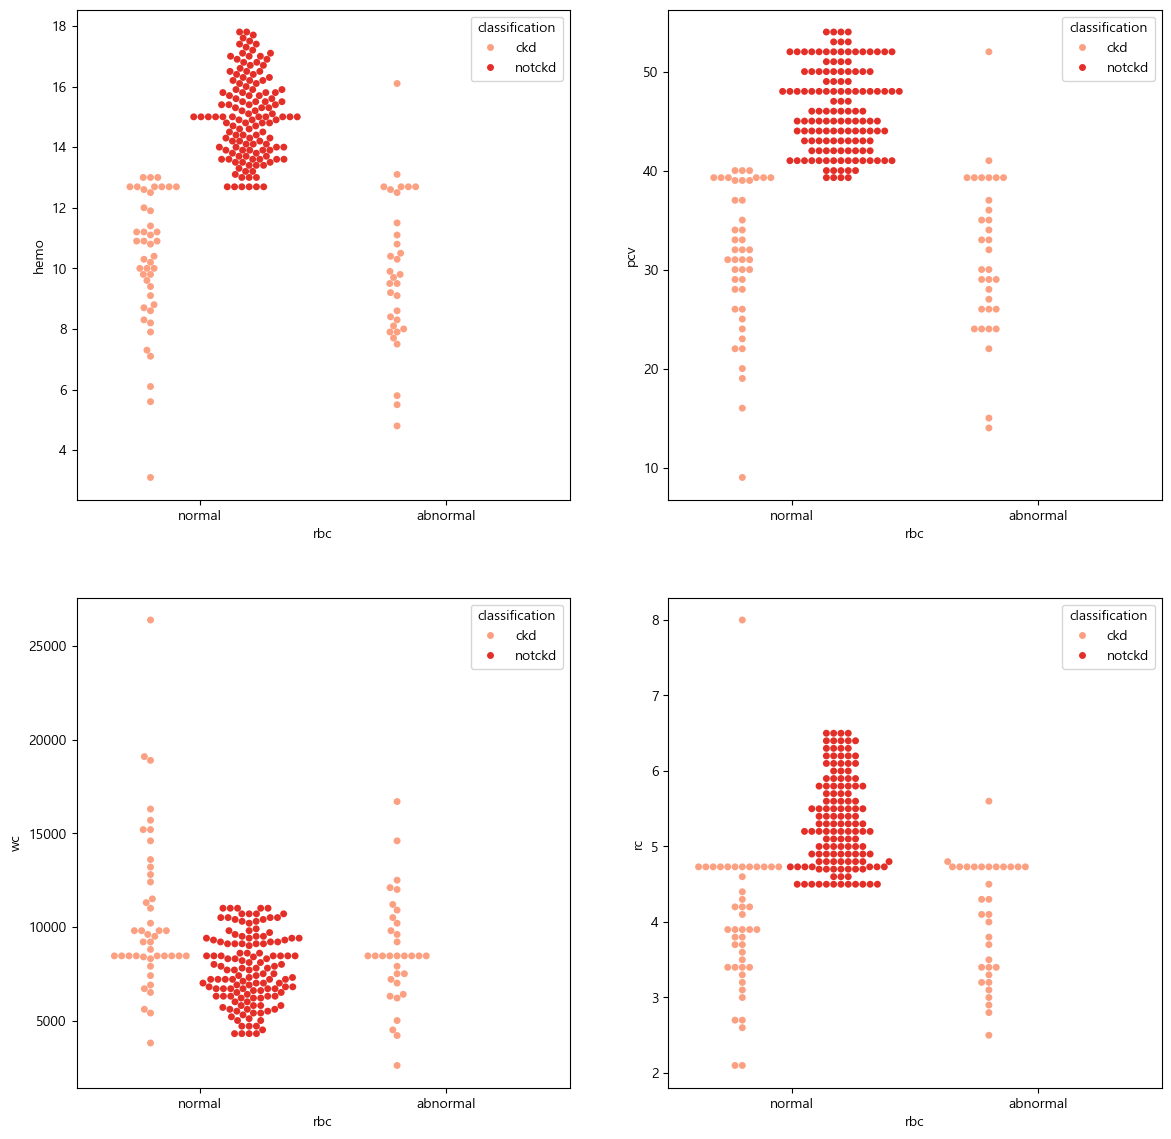

In [468]:
# CKD 여부에 따른 추가비교 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,14))
sns.swarmplot(data=df, y=df['hemo'], x=df['rbc'], palette='Reds', hue='classification', dodge=True, ax=ax[0,0])
sns.swarmplot(data=df, y=df['pcv'], x=df['rbc'], palette='Reds', hue='classification', dodge=True, ax=ax[0,1])
sns.swarmplot(data=df, y=df['wc'], x=df['rbc'], palette='Reds', hue='classification', dodge=True, ax=ax[1,0])
sns.swarmplot(data=df, y=df['rc'], x=df['rbc'], palette='Reds', hue='classification', dodge=True, ax=ax[1,1])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13320\2606002725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bgr'], x=df['rbc'], palette='summer', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2606002725.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sod'], x=df['rbc'], palette='summer', ax=ax[1])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2606002725.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['pot'], x=df['rbc'], palette='summer', ax=ax[2])


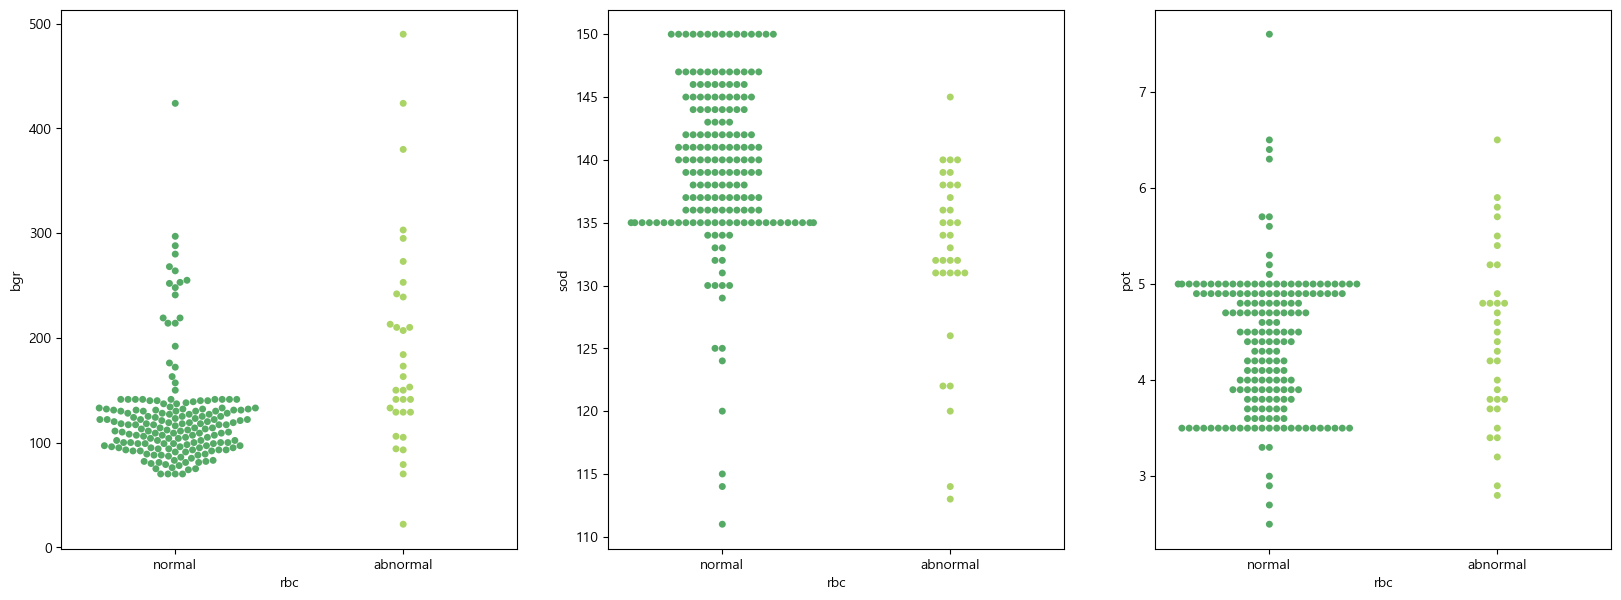

In [469]:
# rbc 정상 여부에 따른 혈청검사
fig, ax = plt.subplots(ncols=3, figsize=(20,7))
sns.swarmplot(y=df['bgr'], x=df['rbc'], palette='summer', ax=ax[0])
sns.swarmplot(y=df['sod'], x=df['rbc'], palette='summer', ax=ax[1])
sns.swarmplot(y=df['pot'], x=df['rbc'], palette='summer', ax=ax[2])
plt.show()

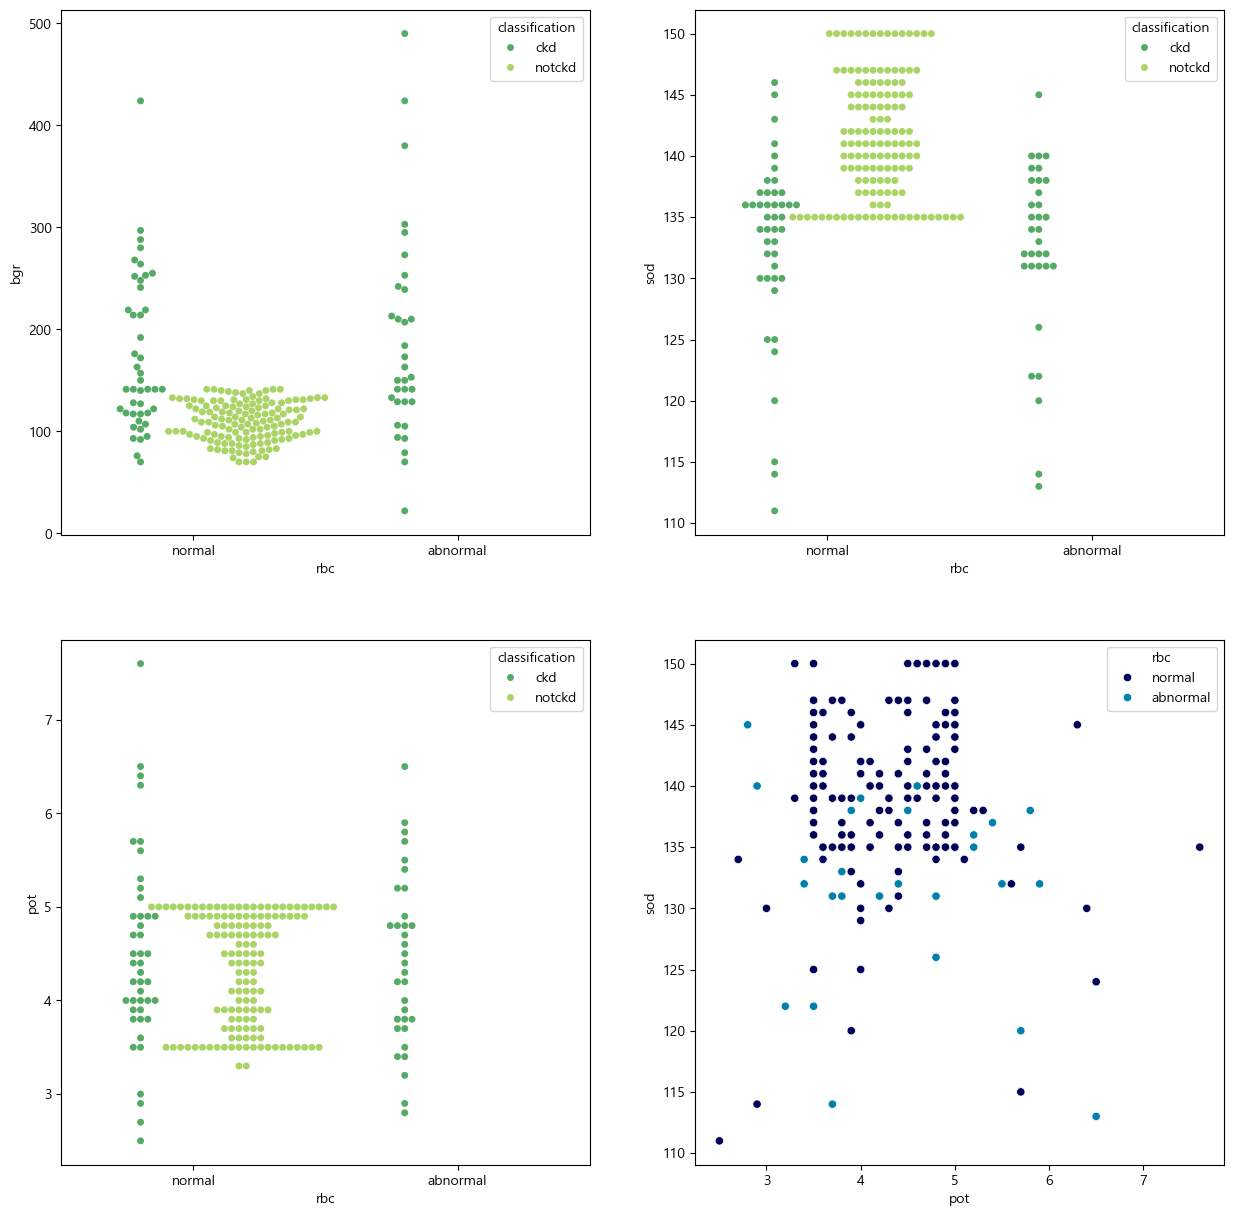

In [470]:
# CKD 여부에 따른 추가비교 
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.swarmplot(data=df, y=df['bgr'], x=df['rbc'], palette='summer',hue='classification', dodge=True, ax=ax[0,0])
sns.swarmplot(data=df, y=df['sod'], x=df['rbc'], palette='summer', hue='classification', dodge=True, ax=ax[0,1])
sns.swarmplot(data=df, y=df['pot'], x=df['rbc'], palette='summer', hue='classification', dodge=True, ax=ax[1,0])
# CKD 와 rbc에 따른  sod, pot 분포도
sns.scatterplot(data=df, x=df['pot'],y=df['sod'], hue='rbc', palette='ocean')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13320\23897483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['hemo'], x=df['pc'], palette='mako', ax=ax[0,0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\23897483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['pcv'], x=df['pc'], palette='mako', ax=ax[0,1])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\23897483.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['wc'], x=df['pc'], palette='mako', ax=ax[1,0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\238

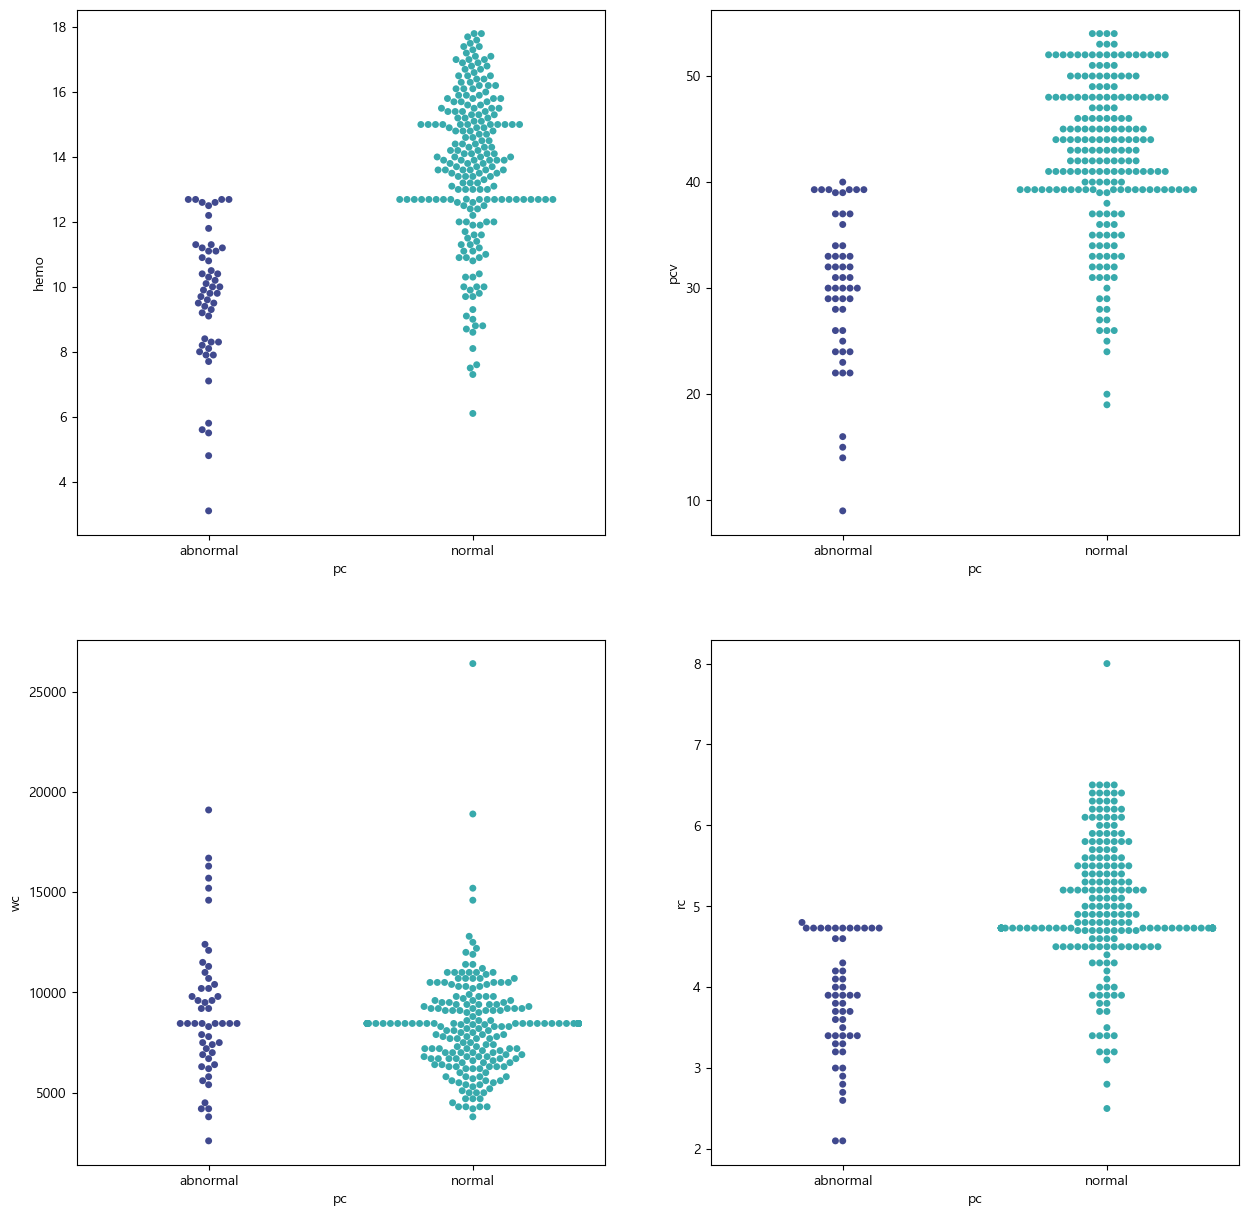

In [471]:
# pc 정상 여부에 따른 혈구검사
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(15,15))
sns.swarmplot(y=df['hemo'], x=df['pc'], palette='mako', ax=ax[0,0])
sns.swarmplot(y=df['pcv'], x=df['pc'], palette='mako', ax=ax[0,1])
sns.swarmplot(y=df['wc'], x=df['pc'], palette='mako', ax=ax[1,0])
sns.swarmplot(y=df['rc'], x=df['pc'], palette='mako', ax=ax[1,1])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


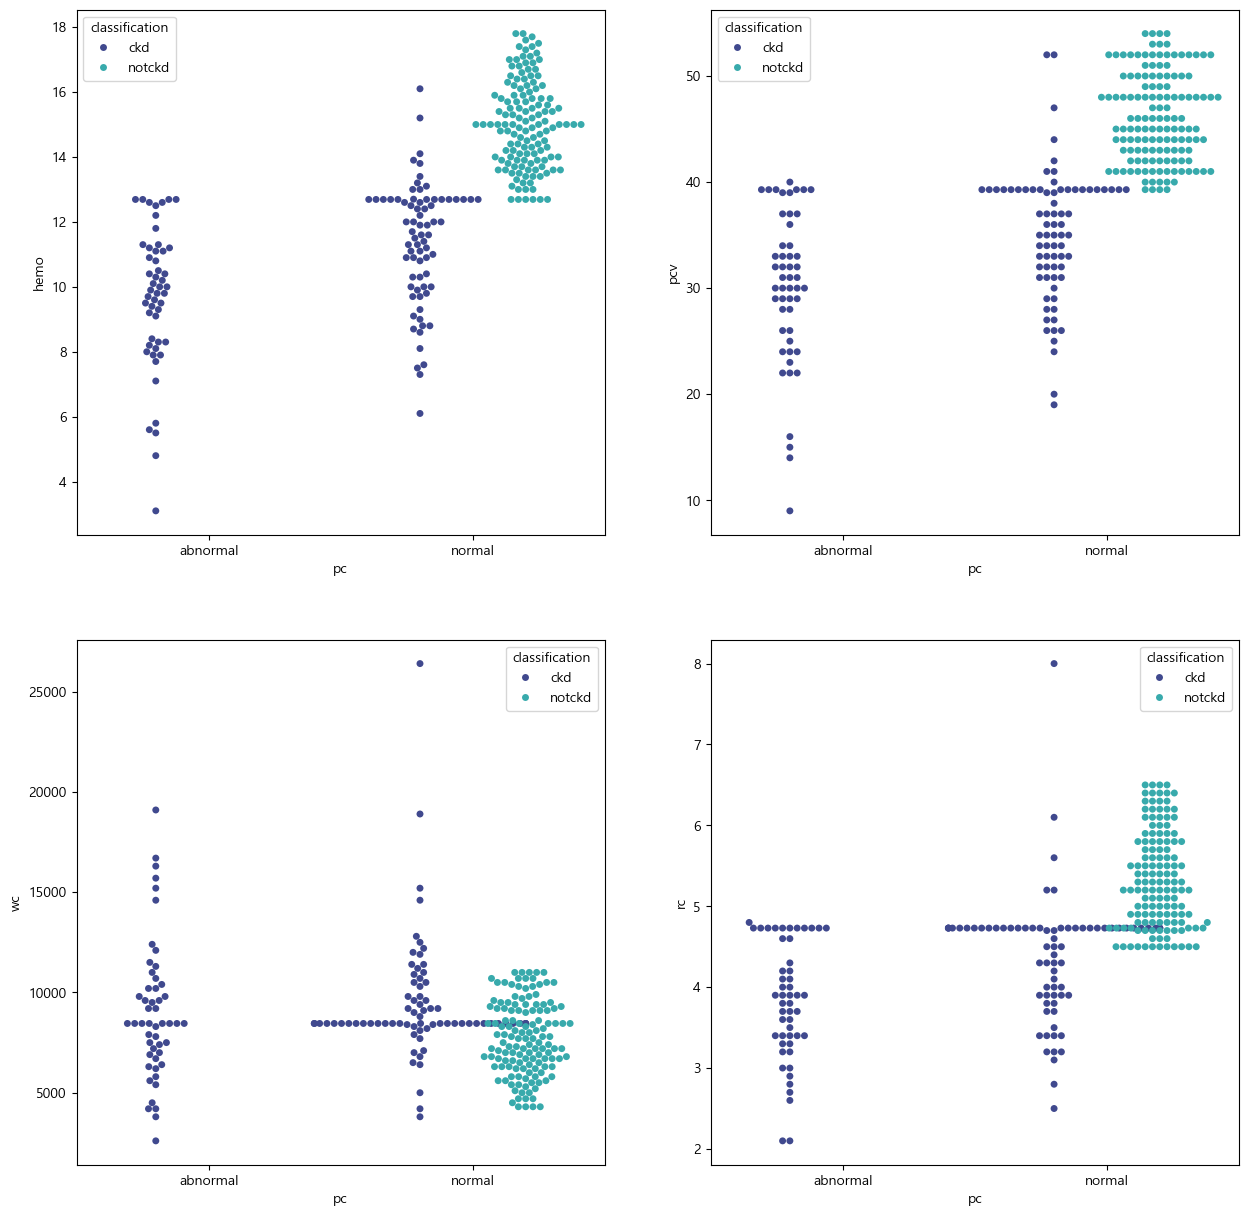

In [472]:
# CKD 여부에 따른 혈구검사 추가비교
fig, ax = plt.subplots(nrows= 2, ncols=2, figsize=(15,15))
sns.swarmplot(data=df, y=df['hemo'], x=df['pc'], palette='mako', hue='classification', dodge=True, ax=ax[0,0])
sns.swarmplot(data=df, y=df['pcv'], x=df['pc'], palette='mako', hue='classification', dodge=True, ax=ax[0,1])
sns.swarmplot(data=df, y=df['wc'], x=df['pc'], palette='mako', hue='classification', dodge=True, ax=ax[1,0])
sns.swarmplot(data=df, y=df['rc'], x=df['pc'], palette='mako', hue='classification', dodge=True, ax=ax[1,1])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13320\2618681461.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bgr'], x=df['pc'], palette='crest', ax=ax[0])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2618681461.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sod'], x=df['pc'], palette='crest', ax=ax[1])
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2618681461.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['pot'], x=df['pc'], palette='crest', ax=ax[2])


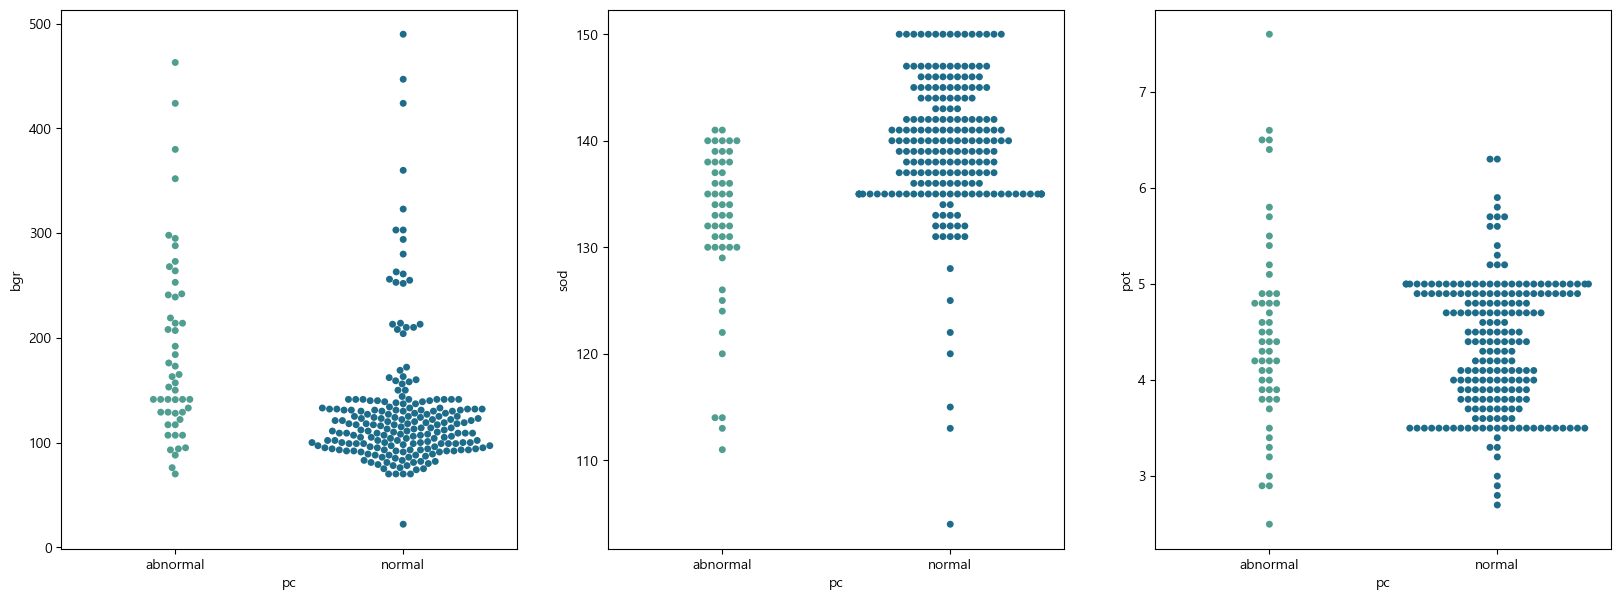

In [473]:
# pc 정상 여부에 따른 혈청검사
fig, ax = plt.subplots(ncols=3, figsize=(20,7))
sns.swarmplot(y=df['bgr'], x=df['pc'], palette='crest', ax=ax[0])
sns.swarmplot(y=df['sod'], x=df['pc'], palette='crest', ax=ax[1])
sns.swarmplot(y=df['pot'], x=df['pc'], palette='crest', ax=ax[2])
plt.show()

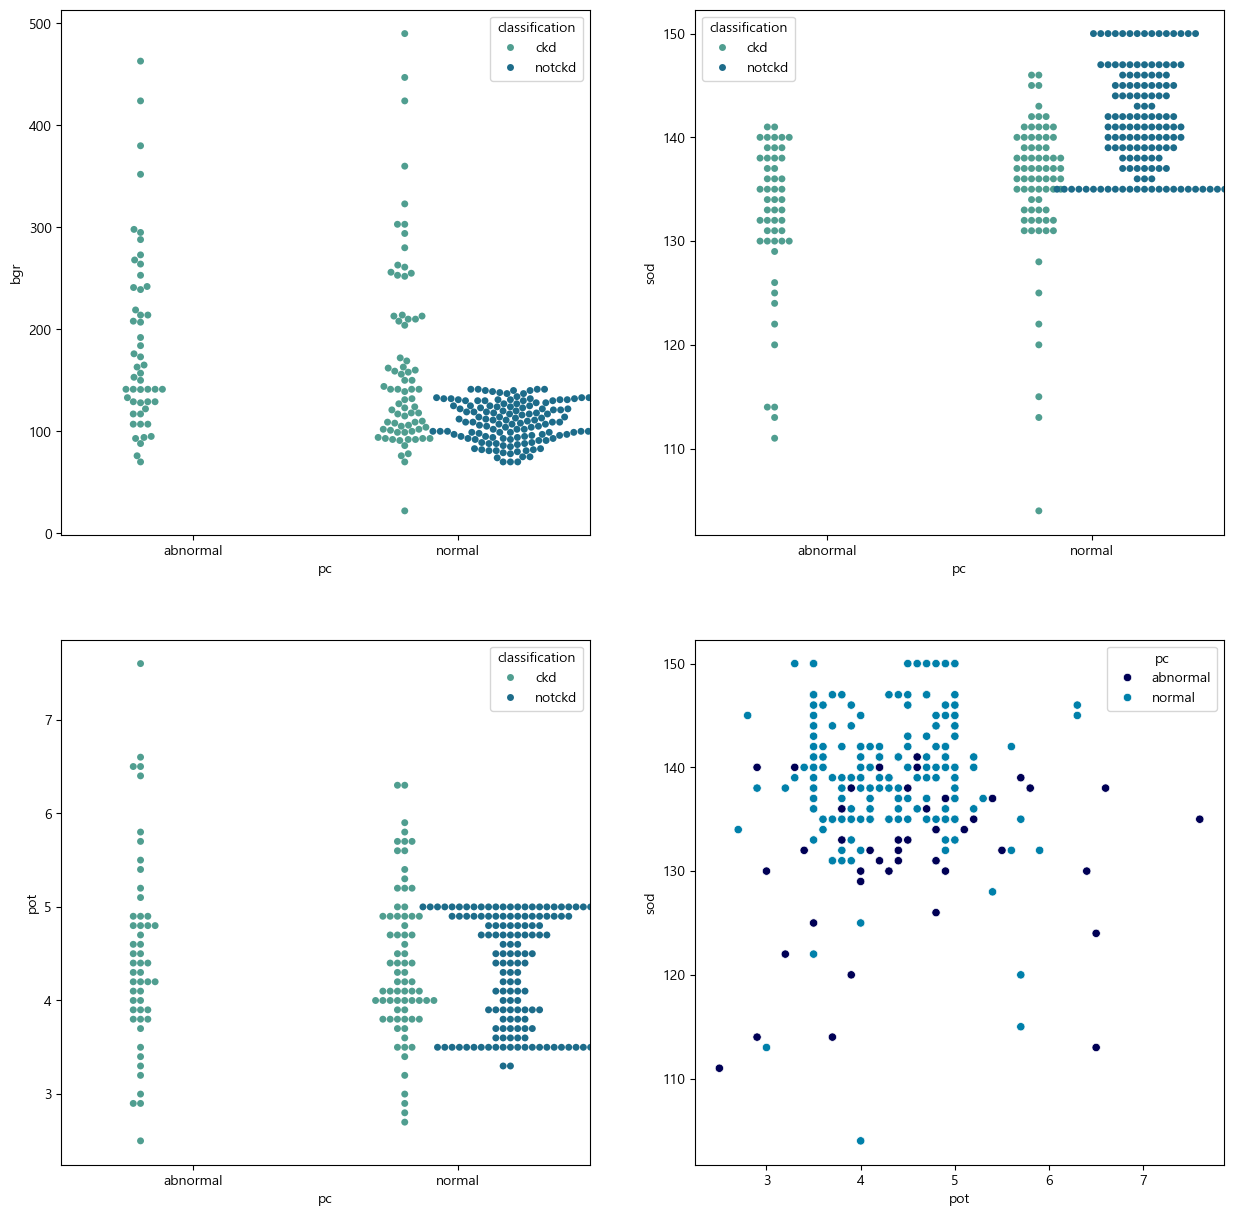

In [474]:
# CKD 여부에 따른 혈청검사 추가비교
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15,15))
sns.swarmplot(data=df, y=df['bgr'], x=df['pc'], palette='crest',hue='classification', dodge=True,  ax=ax[0,0])
sns.swarmplot(data=df, y=df['sod'], x=df['pc'], palette='crest',hue='classification', dodge=True,  ax=ax[0,1])
sns.swarmplot(data=df, y=df['pot'], x=df['pc'], palette='crest',hue='classification', dodge=True,  ax=ax[1,0])
# CKD, pc 정상 여부에 따른 sod, pot 분포도
sns.scatterplot(data=df, x=df['pot'],y=df['sod'], hue='pc', palette='ocean')
plt.show()

In [475]:
# 소변검사에 따른 관계도
urine = ['pcc', 'ba','sg', 'bu', 'sc', 'classification']
new_df[urine]

pcc   ba     sg     bu    sc  classification
3    1.0  0.0  1.005   56.0   3.8               1
5    0.0  0.0  1.015   25.0   1.1               1
6    0.0  0.0  1.010   54.0  24.0               1
9    1.0  0.0  1.020  107.0   7.2               1
11   1.0  0.0  1.010   60.0   2.7               1
..   ...  ...    ...    ...   ...             ...
395  0.0  0.0  1.020   49.0   0.5               0
396  0.0  0.0  1.025   31.0   1.2               0
397  0.0  0.0  1.020   26.0   0.6               0
398  0.0  0.0  1.025   50.0   1.0               0
399  0.0  0.0  1.025   18.0   1.1               0

[310 rows x 6 columns]

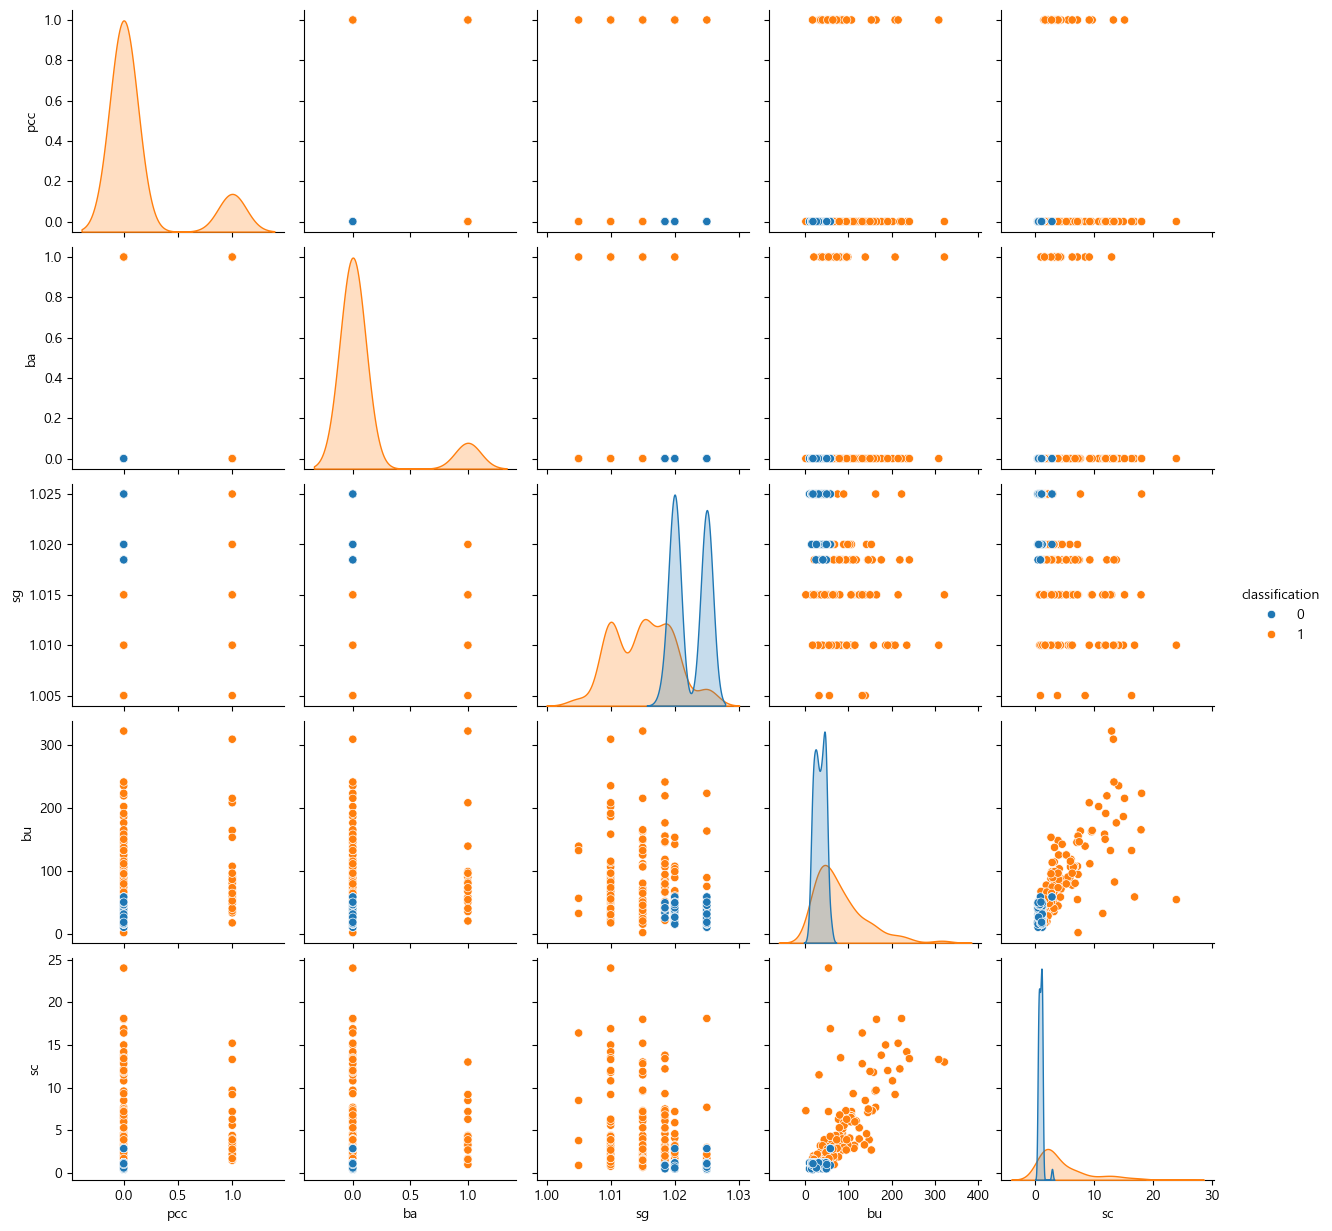

In [476]:
sns.pairplot(new_df[urine], hue='classification', diag_kind="kde")

C:\Users\user\AppData\Local\Temp\ipykernel_13320\739142436.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sg'], x=df['pcc'], palette='flare', ax=ax[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Temp\ipykernel_13320\739142436.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bu'], x=df['pcc'], palette='flare', ax=ax[1])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5

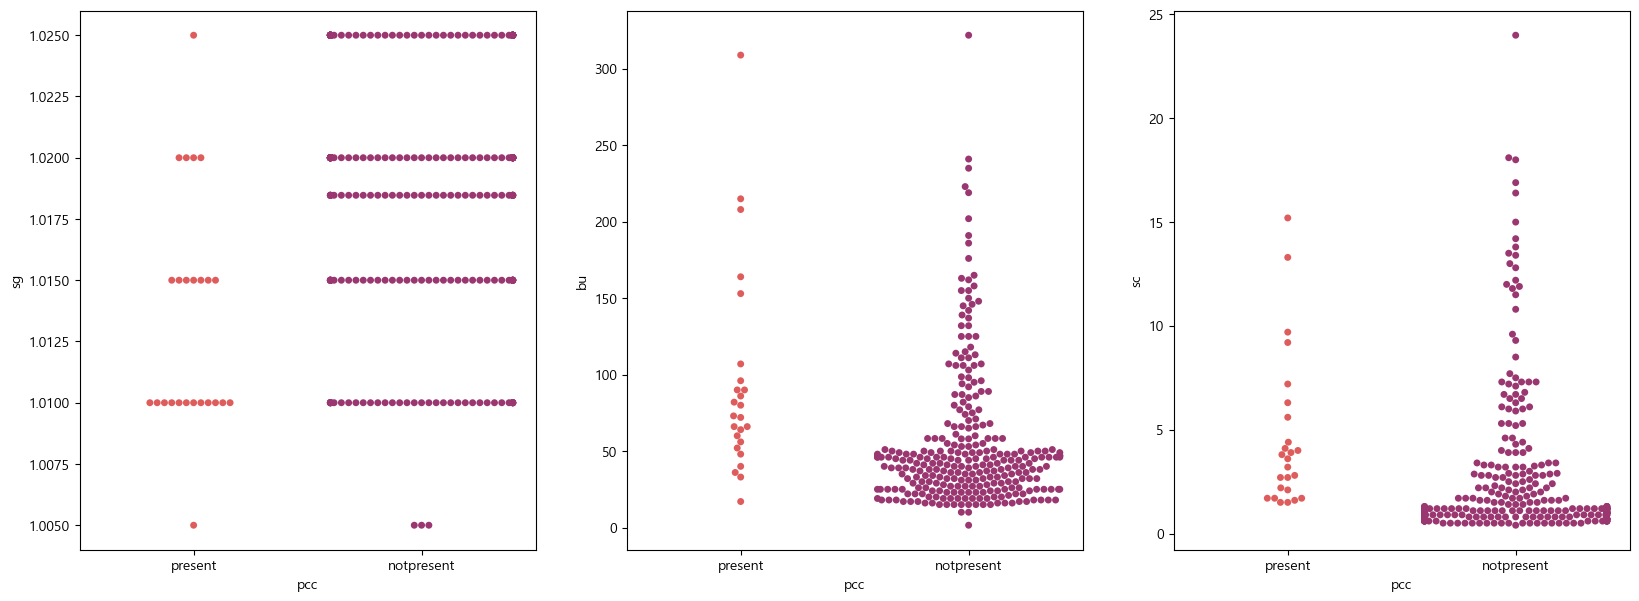

In [477]:
# pcc 존재 여부에 따른 소변검사
fig, ax = plt.subplots(ncols=3, figsize=(20,7))
sns.swarmplot(y=df['sg'], x=df['pcc'], palette='flare', ax=ax[0])
sns.swarmplot(y=df['bu'], x=df['pcc'], palette='flare', ax=ax[1])
sns.swarmplot(y=df['sc'], x=df['pcc'], palette='flare', ax=ax[2])
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

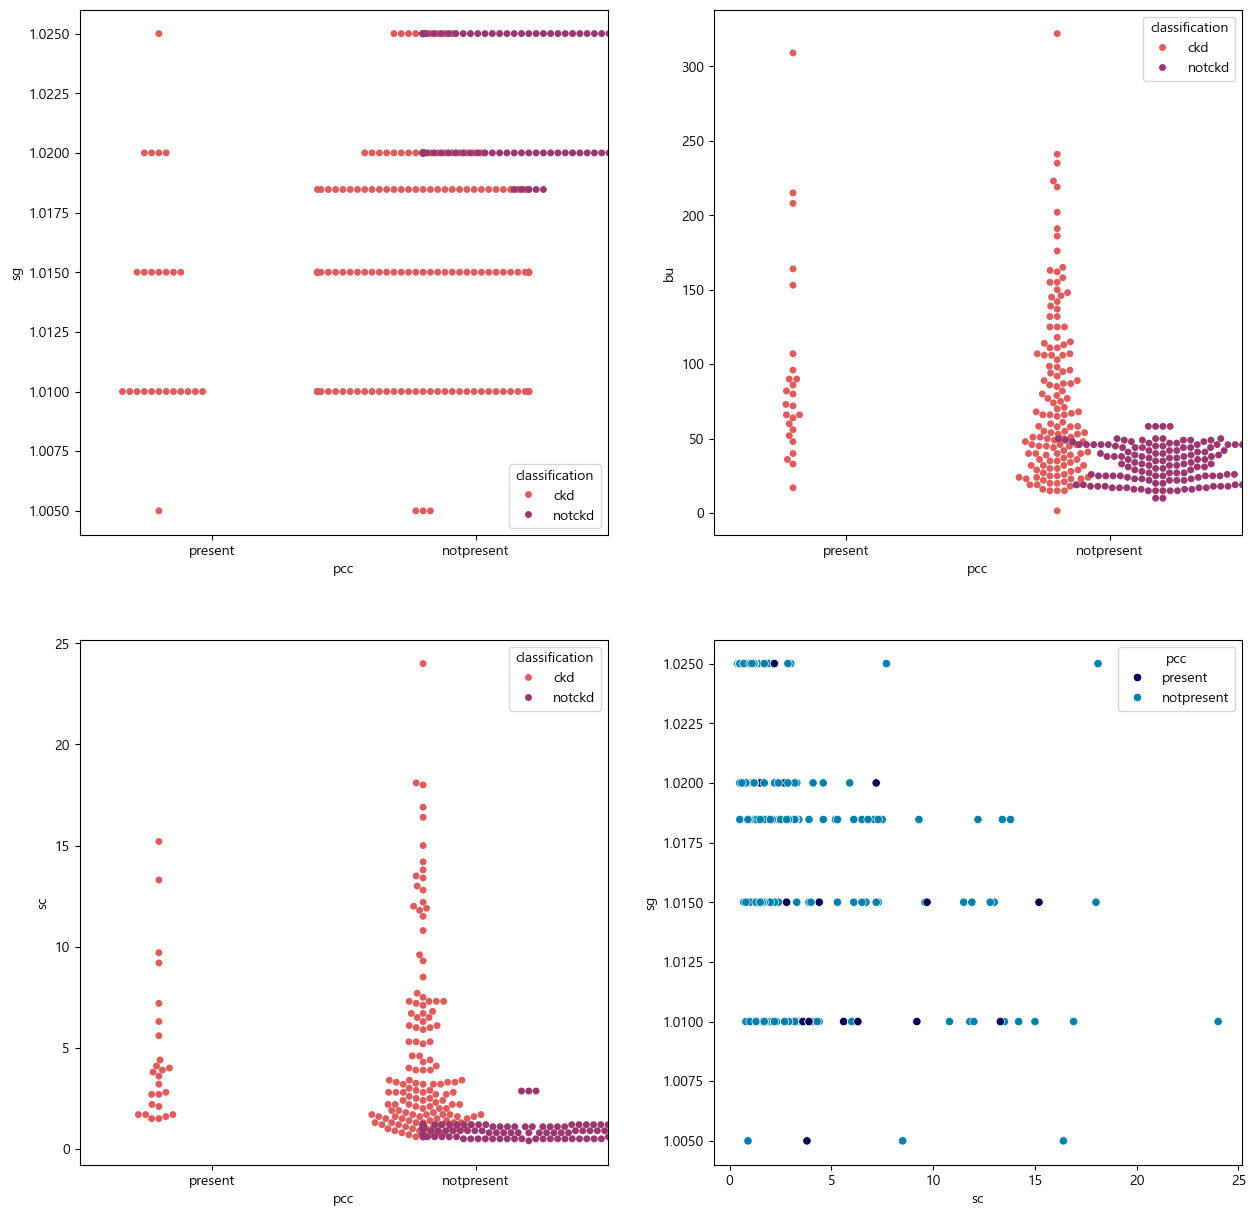

In [478]:
# CKD 여부에 따른 소변검사 추가비교
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(15,15))
sns.swarmplot(data=df, y=df['sg'], x=df['pcc'], palette='flare',hue='classification', dodge=True,  ax=ax[0,0])
sns.swarmplot(data=df, y=df['bu'], x=df['pcc'], palette='flare',hue='classification', dodge=True,  ax=ax[0,1])
sns.swarmplot(data=df, y=df['sc'], x=df['pcc'], palette='flare',hue='classification', dodge=True,  ax=ax[1,0])
sns.scatterplot(data=df, x=df['sc'],y=df['sg'], hue='pcc', palette='ocean',ax=ax[1,1])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13320\2585768383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['sg'], x=df['ba'], palette='gist_heat', ax=ax[0])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\AppData\Local\Temp\ipykernel_13320\2585768383.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y=df['bu'], x=df['ba'], palette='gist_heat', ax=ax[1])
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWa

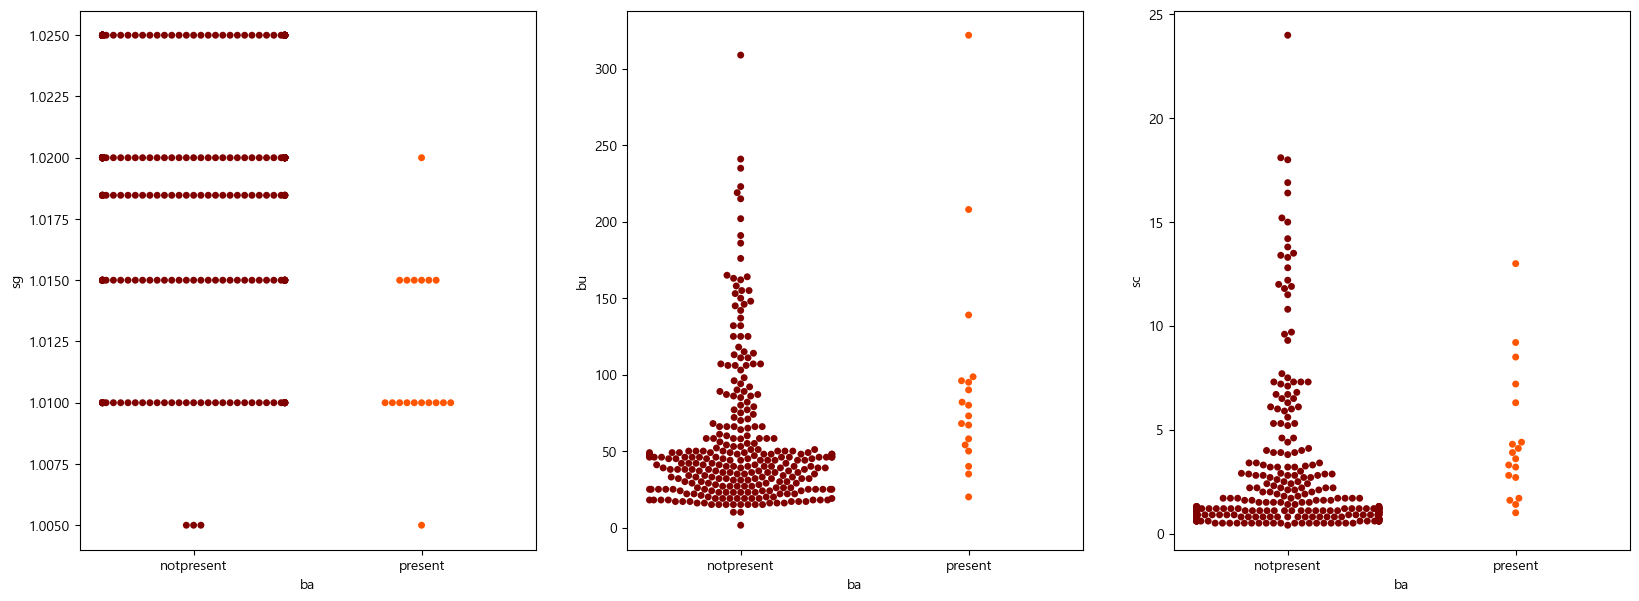

In [479]:
# ba 존재 여부에 따른 소변검사
fig, ax = plt.subplots(ncols=3, figsize=(20,7))
sns.swarmplot(y=df['sg'], x=df['ba'], palette='gist_heat', ax=ax[0])
sns.swarmplot(y=df['bu'], x=df['ba'], palette='gist_heat', ax=ax[1])
sns.swarmplot(y=df['sc'], x=df['ba'], palette='gist_heat', ax=ax[2])

plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

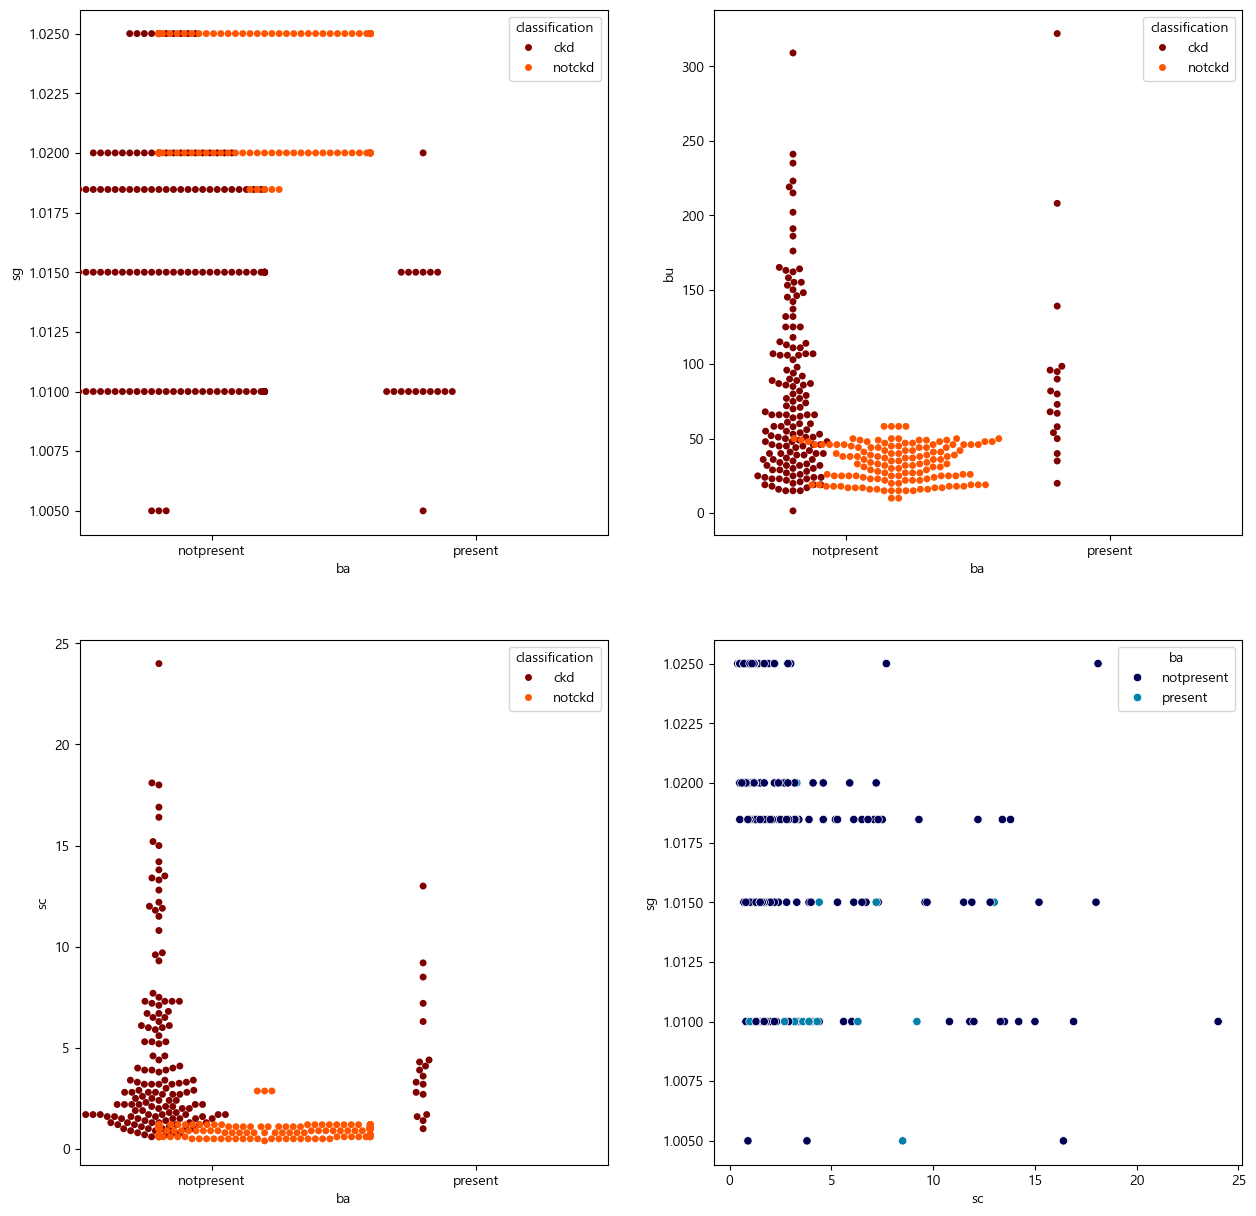

In [480]:
# CKD 여부에 따른 비교 추가
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.swarmplot(data=df, y=df['sg'], x=df['ba'], palette='gist_heat',hue='classification', dodge=True,  ax=ax[0,0])
sns.swarmplot(data=df, y=df['bu'], x=df['ba'], palette='gist_heat',hue='classification', dodge=True,  ax=ax[0,1])
sns.swarmplot(data=df, y=df['sc'], x=df['ba'], palette='gist_heat',hue='classification', dodge=True,  ax=ax[1,0])
sns.scatterplot(data=df, x=df['sc'],y=df['sg'], hue='ba', palette='ocean',ax=ax[1,1])
plt.show()

## 머신러닝 분류

In [481]:
new_df

age    bp     sg   al   su    bgr     bu    sc    sod  pot  ...  pc  \
3    48.0  70.0  1.005  4.0  0.0  117.0   56.0   3.8  111.0  2.5  ...   1   
5    60.0  90.0  1.015  3.0  0.0   74.0   25.0   1.1  142.0  3.2  ...   0   
6    68.0  70.0  1.010  0.0  0.0  100.0   54.0  24.0  104.0  4.0  ...   0   
9    53.0  90.0  1.020  2.0  0.0   70.0  107.0   7.2  114.0  3.7  ...   1   
11   63.0  70.0  1.010  3.0  0.0  380.0   60.0   2.7  131.0  4.2  ...   1   
..    ...   ...    ...  ...  ...    ...    ...   ...    ...  ...  ...  ..   
395  55.0  80.0  1.020  0.0  0.0  140.0   49.0   0.5  150.0  4.9  ...   0   
396  42.0  70.0  1.025  0.0  0.0   75.0   31.0   1.2  141.0  3.5  ...   0   
397  12.0  80.0  1.020  0.0  0.0  100.0   26.0   0.6  137.0  4.4  ...   0   
398  17.0  60.0  1.025  0.0  0.0  114.0   50.0   1.0  135.0  4.9  ...   0   
399  58.0  80.0  1.025  0.0  0.0  131.0   18.0   1.1  141.0  3.5  ...   0   

     pcc   ba  htn   dm  cad  appet   pe  ane  classification  
3    1.0  0.0  1.0  0.0  0.0    1.0  1.0  1.0               1  
5    0.0  0.0  1.0  1.0  0.0    0.0  1.0  0.0               1  
6    0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               1  
9    1.0  0.0  1.0  1.0  0.0    1.0  0.0  1.0               1  
11   1.0  0.0  1.0  1.0  0.0    1.0  1.0  0.0               1  
..   ...  ...  ...  ...  ...    ...  ...  ...             ...  
395  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0  
396  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0  
397  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0  
398  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0  
399  0.0  0.0  0.0  0.0  0.0    0.0  0.0  0.0               0  

[310 rows x 25 columns]

In [482]:
# 결측치 처리
new_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc               0
pc                0
pcc               4
ba                4
htn               2
dm                2
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

In [483]:
new_df = new_df.fillna('0')

In [484]:
new_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [485]:
new_df.to_numpy()

array([[48.0, 70.0, 1.005, ..., 1.0, 1.0, 1],
       [60.0, 90.0, 1.015, ..., 1.0, 0.0, 1],
       [68.0, 70.0, 1.01, ..., 0.0, 0.0, 1],
       ...,
       [12.0, 80.0, 1.02, ..., 0.0, 0.0, 0],
       [17.0, 60.0, 1.025, ..., 0.0, 0.0, 0],
       [58.0, 80.0, 1.025, ..., 0.0, 0.0, 0]], dtype=object)

In [486]:
# 데이터 나누기
data_input = new_df.iloc[:,:-1]
data_target = new_df.iloc[:,-1]

In [487]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data_input,data_target)

In [488]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 1. SVM 모델

In [489]:
from sklearn import svm, metrics
sv = svm.SVC(kernel='poly')
sv.fit(train_scaled, train_target)
result = sv.predict(test_scaled)
print("SVM train 정답률 :",sv.score(train_scaled,train_target))
print("SVM test 정답률 :",sv.score(test_scaled,test_target))

SVM train 정답률 : 0.9827586206896551
SVM test 정답률 : 0.9615384615384616


In [490]:
from sklearn.metrics import confusion_matrix
sv_pred = sv.predict(test_scaled)
sv_conf = confusion_matrix(test_target, sv_pred)
sv_conf

array([[43,  0],
       [ 3, 32]], dtype=int64)

Text(51.722222222222214, 0.5, 'true')

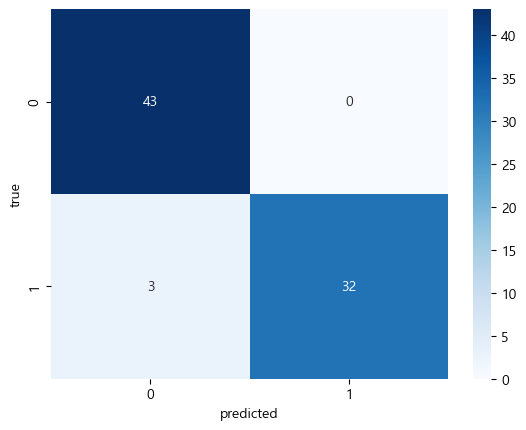

In [491]:
sns.heatmap(sv_conf, annot=True, cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("true")

In [492]:
from sklearn.metrics import classification_report
sv_report = classification_report(test_target, sv_pred)
print(sv_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.91      0.96        35

    accuracy                           0.96        78
   macro avg       0.97      0.96      0.96        78
weighted avg       0.96      0.96      0.96        78



### 2. KNN 모델

In [493]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_scaled , train_target)
print(" KNN train 정답률 :", kn.score(train_scaled, train_target))
print(" KNN test 정답률 :", kn.score(test_scaled, test_target))

 KNN train 정답률 : 0.9655172413793104
 KNN test 정답률 : 0.9487179487179487


In [494]:
kn_pred = kn.predict(test_scaled)
kn_conf = confusion_matrix(test_target, kn_pred)
kn_conf

array([[43,  0],
       [ 4, 31]], dtype=int64)

In [495]:
kn_report = classification_report(test_target, kn_pred)
print(kn_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       1.00      0.89      0.94        35

    accuracy                           0.95        78
   macro avg       0.96      0.94      0.95        78
weighted avg       0.95      0.95      0.95        78



### 3. 로지스틱회귀 모델

In [496]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(" Logistic Regressioin train 정답률 :",lr.score(train_scaled, train_target))
print(" Logistic Regressioin test 정답률 :",lr.score(test_scaled, test_target))

 Logistic Regressioin train 정답률 : 1.0
 Logistic Regressioin test 정답률 : 0.9743589743589743


### 4. 결정트리 모델

In [497]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 42)
dt.fit(train_scaled,train_target)
print(" DecisionTree train 정답률 :",dt.score(train_scaled, train_target))
print(" DecisionTree test 정답률 :",dt.score(test_scaled, test_target))

 DecisionTree train 정답률 : 1.0
 DecisionTree test 정답률 : 0.9358974358974359


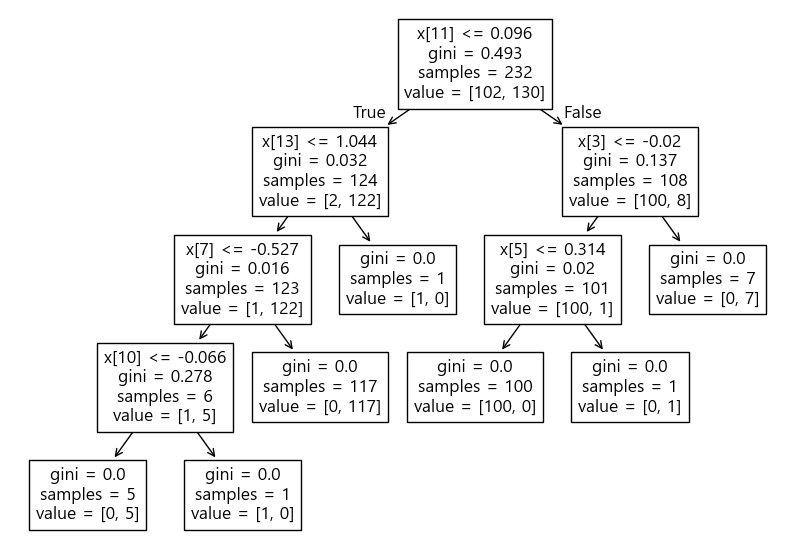

In [498]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

### 5. XGBoost 모델

In [499]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, learning_rate=0.3, max_depth=3, random_state=32)
xgb.fit(train_scaled, train_target)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=32, ...)

In [500]:
from sklearn.metrics import accuracy_score
pred = xgb.predict(test_scaled)
print("XGBoost train 정답률 :", xgb.score(train_scaled, train_target))
print("XGBoost test 정답률 :", xgb.score(test_scaled, test_target))

XGBoost train 정답률 : 1.0
XGBoost test 정답률 : 0.9358974358974359


### 6. LightBoost 모델

In [501]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier(num_leaves=30, objective='binary')
lgbm.fit(train_scaled, train_target)
print("LightBoost train 정답률 :", lgbm.score(train_scaled, train_target))
print("LightBoost test 정답률 :", lgbm.score(test_scaled, test_target))

[LightGBM] [Info] Number of positive: 130, number of negative: 102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 483
[LightGBM] [Info] Number of data points in the train set: 232, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560345 -> initscore=0.242562
[LightGBM] [Info] Start training from score 0.242562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

## 머신러닝 예측

#### 1. KNeighbors Regressor 모델

In [502]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [503]:
all_score1 = []
all_score2 = []

for num in range(1,20):
    knr.n_neighbors = num
    knr.fit(train_scaled, train_target)
    knr_pred = knr.predict(test_scaled)
    score1 = knr.score(train_scaled, train_target)
    score2 = knr.score(test_scaled, test_target)
    all_score1.append(score1)
    all_score2.append(score2)
    print("train 예측률 : ", score1, " /  test 예측률 : ", score2 , " / 예측률 차 :" ,score1-score2)

train 예측률 :  1.0  /  test 예측률 :  0.8963455149501661  / 예측률 차 : 0.10365448504983388
train 예측률 :  0.9693815987933635  /  test 예측률 :  0.8574750830564783  / 예측률 차 : 0.11190651573688515
train 예측률 :  0.9475113122171945  /  test 예측률 :  0.8560354374307863  / 예측률 차 : 0.09147587478640828
train 예측률 :  0.928921568627451  /  test 예측률 :  0.8445182724252491  / 예측률 차 : 0.08440329620220188
train 예측률 :  0.9209170437405731  /  test 예측률 :  0.8217142857142856  / 예측률 차 : 0.09920275802628753
train 예측률 :  0.9071727836433718  /  test 예측률 :  0.8142857142857143  / 예측률 차 : 0.09288706935765756
train 예측률 :  0.8971650198540955  /  test 예측률 :  0.8159604040951929  / 예측률 차 : 0.08120461575890259
train 예측률 :  0.8909219457013575  /  test 예측률 :  0.8396594684385381  / 예측률 차 : 0.051262477262819406
train 예측률 :  0.879902426307655  /  test 예측률 :  0.8342807924203273  / 예측률 차 : 0.04562163388732776
train 예측률 :  0.8663288084464555  /  test 예측률 :  0.8325980066445182  / 예측률 차 : 0.03373080180193733
train 예측률 :  0.8535233037906835  /  

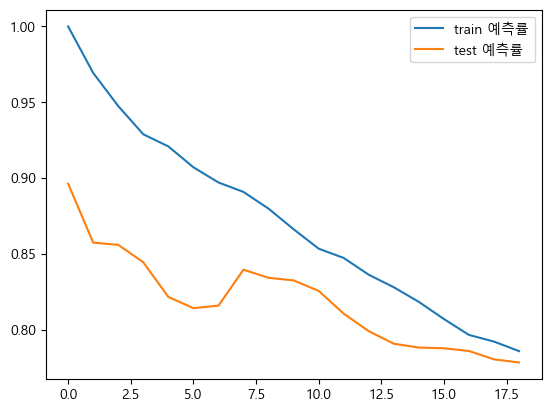

In [504]:
plt.plot(all_score1, label='train 예측률')
plt.plot(all_score2, label='test 예측률')
plt.legend()

#### 2. Linear Regression Model

In [506]:
# 선형회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print("Linear Regression train 예측률",lr.score(train_input, train_target))
print("Linear Regression test 예측률",lr.score(test_input, test_target))

Linear Regression train 예측률 0.7823347428148366
Linear Regression test 예측률 0.72871648781068


In [507]:
# 다항회귀
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [508]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

1.0
-185.71328945253177


In [509]:
# 다항화된 데이터 표준화

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [510]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9978041047440764
-0.7919852050149105


In [511]:
train_score = []
test_score= []

alpha_list = [0.001,0.01,0.1,1,10,100,1000,10000]

for alpha in alpha_list:
    ridge = Ridge(alpha =alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


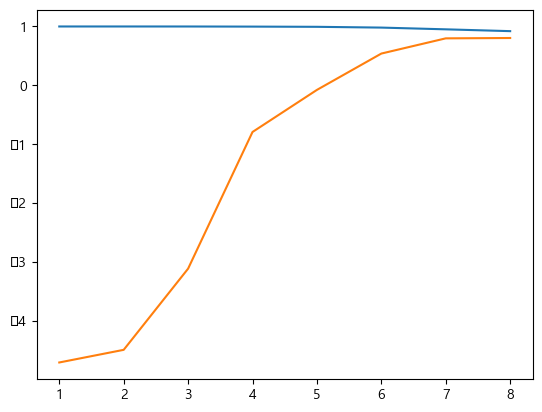

In [512]:
x = np.arange(1,9).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)

#### 3. SGD Classifier

In [513]:
# 경사하강법
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss',max_iter=5, random_state=42)
scores = cross_validate(sc,train_scaled,train_target,n_jobs=-1) 
print(np.mean(scores['test_score']))

0.832377428307123


In [514]:
train_score = []
test_score = []

classes = np.unique(train_target)
for _ in range(100):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

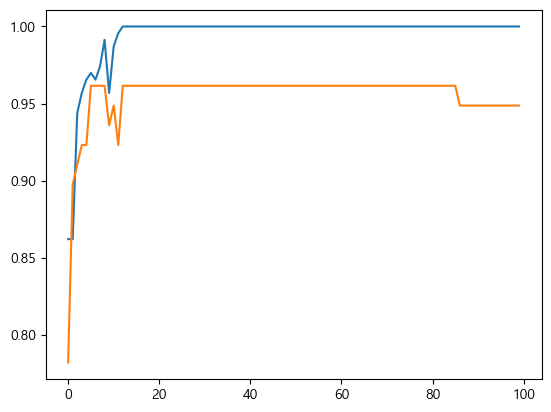

In [515]:
plt.plot(train_score, label='train 예측률')
plt.plot(test_score, label='test 예측률')

In [516]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

1.0
0.9487179487179487


#### 4. 랜덤포레스트

In [517]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1, random_state=42)

scores = cross_validate(rf,train_input, train_target, return_train_score=True, n_jobs=-1)
rf.fit(train_input, train_target)
print("Random Forest train 예측률 : ",np.mean(scores['train_score']))
print("Random Forest test 예측률 : ", np.mean(scores['test_score']))

Random Forest train 예측률 :  1.0
Random Forest test 예측률 :  0.9869565217391305


#### 5. LightBoost

In [518]:
param = {'num_leaves':30, 'objective':'binary', 'metric':'auc'}
train_data = lgb.Dataset(train_scaled, label= train_target.values)
num_round = 10
lgbm_p = lgb.train(param, train_data,  num_round)
lgbm_p_pred = lgbm_p.predict(test_scaled)
pred_test = pd.Series(lgbm_p_pred).apply(lambda x:1 if x>=0.5 else 0)
accuracy_score(test_target, pred_test)

[LightGBM] [Info] Number of positive: 130, number of negative: 102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.131010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287144
[LightGBM] [Info] Number of data points in the train set: 232, number of used features: 53771
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.560345 -> initscore=0.242562
[LightGBM] [Info] Start training from score 0.242562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

0.9230769230769231

In [519]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def pred_report(y, pred):
    mae = mean_absolute_error(y, pred)
    mse = np.sqrt(mean_squared_error(y, pred))
    print( mae, "/" , mse)

In [520]:
print("KNRegression의 평가지표 ( MAE , MSE ) : ") 
pred_report(test_target, knr_pred)

KNRegression의 평가지표 ( MAE , MSE ) : 
0.08569500674763833 / 0.23408956830465924


In [521]:
print("LightBoost의 평가지표 ( MAE , MSE ) : ")
pred_report(test_target, lgbm_p_pred)

LightBoost의 평가지표 ( MAE , MSE ) : 
0.2410003223113305 / 0.28194090983927544
